# Set up environment
* imports
* [function] : where it's from(parents)
* ?function : document
* ??function : source code

In [ ]:
%tensorflow_version 1.x

!pip install sklearn

# !pip install fastai==0.7.0
# from fastai.imports import *
# from fastai.structured import *

import os, math
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from glob import glob

!pip install nltools
from nltools.data import Brain_Data

# !pip install nilearn
from nilearn import image, plotting, regions, masking

# !pip install nibabel
import nibabel as nib

!pip install nistats
from nistats.thresholding import map_threshold

!pip install -U imbalanced-learn

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics, model_selection

import seaborn as sns

!pip install 'plotnine[all]'

# To measure time
import timeit

# !pip install graphviz
# !brew install graphviz
import graphviz
# from sklearn.tree import export_graphviz

!pip install rfpimp

# automatically load packages
# %reload_ext autoreload
# %autoreload 2

# show plots within code
%matplotlib inline

In [ ]:
np.random.seed(42)   # always need to test on the same validation set

In [ ]:
# library for converting dicom to nii
# !pip install bidsify

# check nifti info
f= nib.load(f'{data_path}/f001KCS-092813-00001-00001-1.nii')
h = f.header
h.get_zooms()
print(h)

# Load data


In [ ]:
from google.colab import drive
drive.mount('/gdrive')  #, force_remount=True)

# set dir
# use py3 string format

data_path = f'/gdrive/My Drive/SSK-Cyberball-MVPA/mvpa_dataset'

results = f'{data_path}/results'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


## Setup Dataset
* Types of data : (1) structured = diff kinds of data (tables) (2) unstructured = same kind of data (images) 
*  Forest classifiers have to be fitted with two arrays: 
  * a sparse or dense array X of size [n_samples, n_features] holding the training samples
  * an array Y of size [n_samples] holding the target values (class labels) for the training samples

* recommend at least 22 samples in each class (the least number of samples for t dist to turn into normal dist)

### Load fMRI Images

['/gdrive/My Drive/mvpa_dataset/conE_stc/007_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/009_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/011_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/012_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/013_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/014_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/017_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/018_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/019_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/020_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/021_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/022_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/023_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/024_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/025_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/027_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/028_conE.nii', '/gdrive/My Drive/mvpa_dataset/conE_stc/029_conE.nii', '/gdrive/


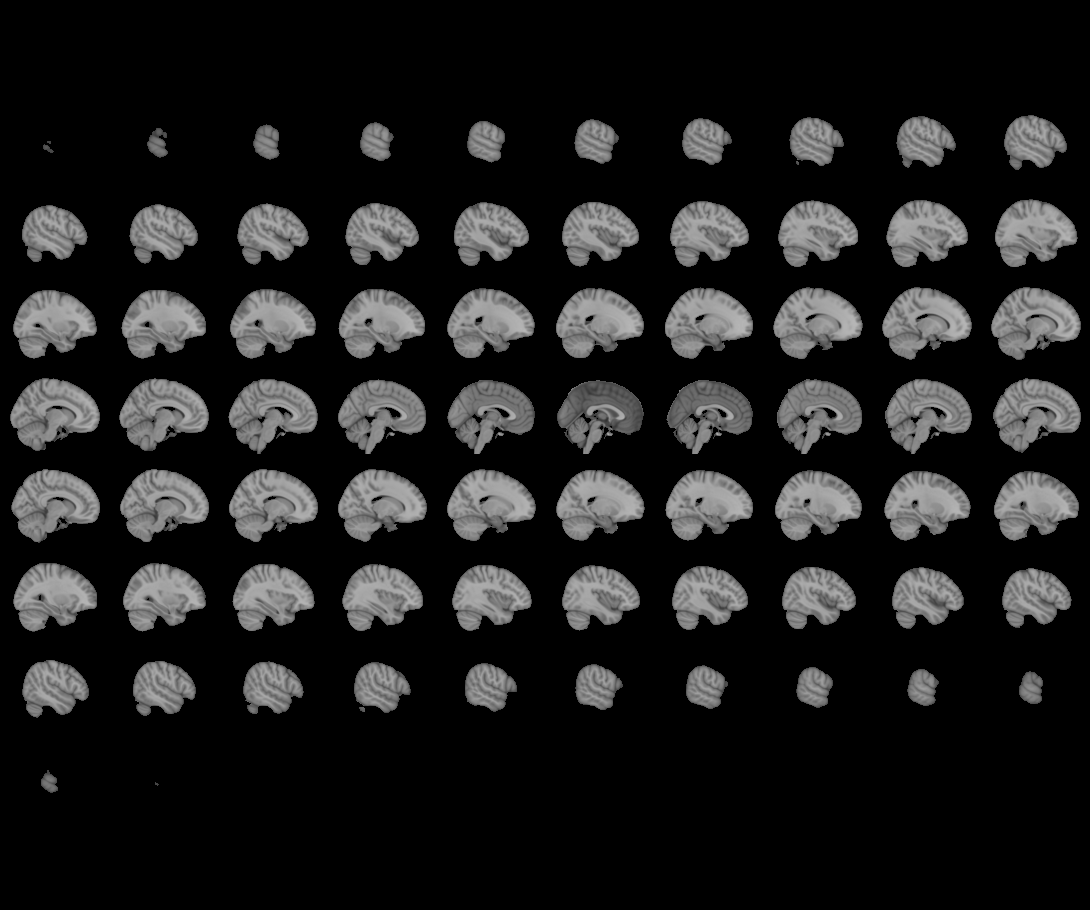
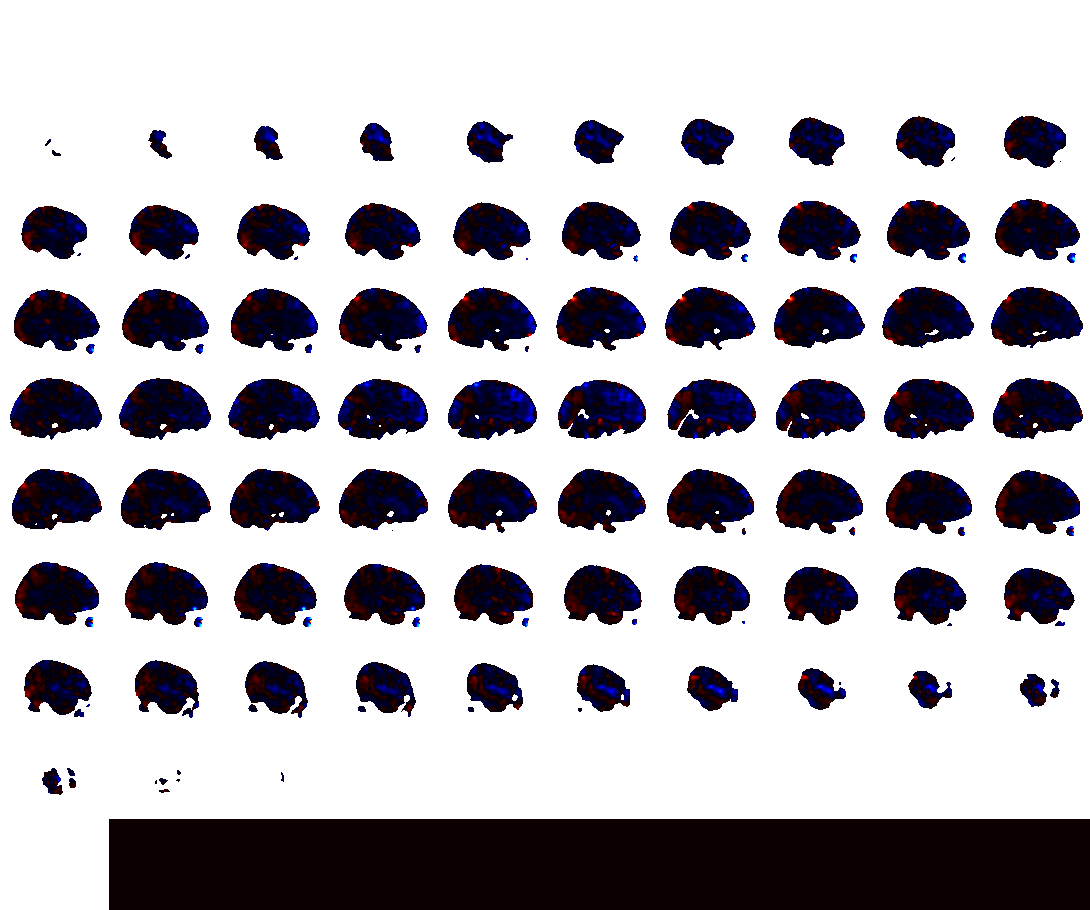

In [ ]:
# Load data
# data_x : fmri images (IV)
# data_y : target data (DV)

n_sbj=88
data_x = [None]*n_sbj
data_y = [None]*n_sbj

bold_dir = f'{data_path}/conE_stc'
subj_list=sorted(glob(f'{bold_dir}/*.nii'))
      
for i, subj in enumerate(subj_list) :
  data_x[i] = subj   # create a list of fmri filenames (3-D image for 88 subjects)

print(data_x)
# sample = image.mean_img(data_x)
sample = image.load_img(data_x[66])

print("Size of fmri image : ", sample.shape)

orth_cd = [[30,-19,71],[-33,-23,71],[-65,-20,10],[0,-89,1]]

# Examplary subject's contrast image
plotting.view_img(data_x[0], title='sample image', draw_cross=True)


In [ ]:
dat1=data_x   # exclusion

In [ ]:
dat2=data_x   # inclusion

In [ ]:
data_x = dat1+dat2;data_x

['/gdrive/My Drive/mvpa_dataset/conE_stc/007_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/009_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/011_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/012_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/013_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/014_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/017_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/018_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/019_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/020_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/021_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/022_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/023_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/024_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/025_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/027_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/028_conE.nii',
 '/gdrive/My Drive/mvpa_dataset/conE_stc/029_con

In [ ]:
# check if shapes of image & mask are the same
mask=image.load_img(mask_fname)

print(masker.affine_, mask.shape)

sample = image.load_img(data_x[0])
print(sample.affine, sample.shape)

[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]] (91, 109, 91)
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]] (91, 109, 91)


In [ ]:
# Check group-level activation patterns
# X = timepoints x voxels (group average activations)
# Y = timepoints x timepoints (similarity of timepoints)

import scipy.spatial.distance as sp_distance

grp_mean

dist_mat = sp_distance.squareform(sp_distance.pdist(matrix))
plt.figure(figsize=(7,5))
plt.title('Distance between pairs of time points')
plt.xlabel('TR')
plt.ylabel('TR')
plt.imshow(dist_mat, cmap='viridis')
plt.colorbar()

### Load behavioral data

In [ ]:
beh_dir = f'{data_path}/beh'
attr_fname = f'{beh_dir}/cb_vars.xlsx'

beh_dat = pd.read_excel(attr_fname)

# predicting variable
data_y = pd.read_excel(attr_fname)['loneli']    # series of beh variables

# print(data_y.value_counts())
data_y[pd.isnull(data_y)]=0    # nan -> 0

if isinstance(data_y[0], bool):
  plt.bar(data_y)
  plt.show();
elif isinstance(data_y[0], (int, float)):
  print("median : ", np.median(data_y))
  plt.hist(data_y)
  plt.show();
elif isinstance(data_y[0], str) :
  plt.bar(data_y, [])
  plt.xticks=['High', 'Low']
  plt.show();

print("median : ", np.median(data_y))


median :  35.0


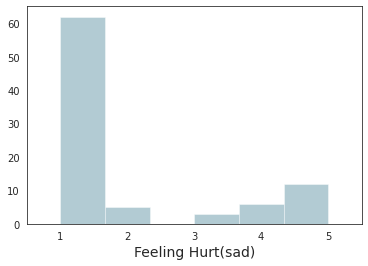

In [ ]:
# Histogram
with sns.axes_style('white'), sns.diverging_palette(220, 10) as palette:
  h=sns.distplot(beh_dat.sad, kde=False, rug=False, color=palette[0],bins=6)
  plt.xlabel("Feeling Hurt(sad)", fontsize=14)
  plt.xlim(0.5,5.5)

  plt.savefig(f'{results}/hist_sad.png')

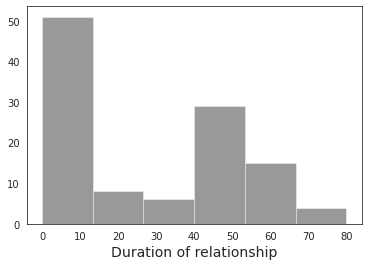

In [ ]:
# histogram
with sns.axes_style('white'):
  h=(sns.distplot(tmp['rel_duration'], kde=False, rug=False, color='black', bins=6))
  plt.xlabel("Duration of relationship", fontsize=14)
  # plt.xlim(0.5, 5.5)

plt.savefig(f'{results}/hist_reldur.png', transparent=True)

In [ ]:
rel_fname = f'{beh_dir}/00relationship_coding.xlsx'

rel_dat = pd.read_excel(rel_fname, sheet_name='176'); rel_dat

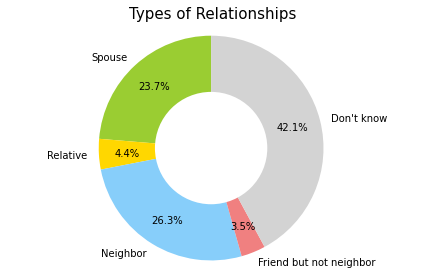

In [ ]:
# Pie chart
fig1, ax1 = plt.subplots()
ax1.size=(20,20)

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0, 0)

labels = ["Spouse", "Relative", "Neighbor", "Friend but not neighbor", "Don't know"]
sizes = [27, 5, 30, 4, 48]
#colors
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'lightgray']

ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode = explode)
# plt.legend(labels, loc="best")

# draw white circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.title("Types of Relationships", fontsize=15)
plt.tight_layout()

plt.savefig(f'{results}/pie_reltype.png')

plt.show()

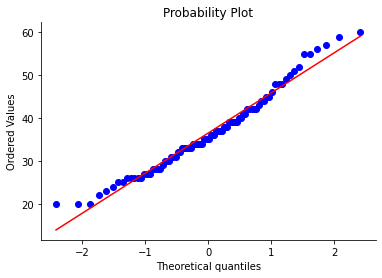

In [ ]:
# check probability plot to identify the distribution of data 
# if data is along the diagnonal line, then data follows the distribution

from scipy.stats import probplot, loggamma

fig = plt.figure()
ax = fig.add_subplot(111)
pp = probplot(beh_dat['loneli'], plot=ax, dist='norm')
sns.despine()

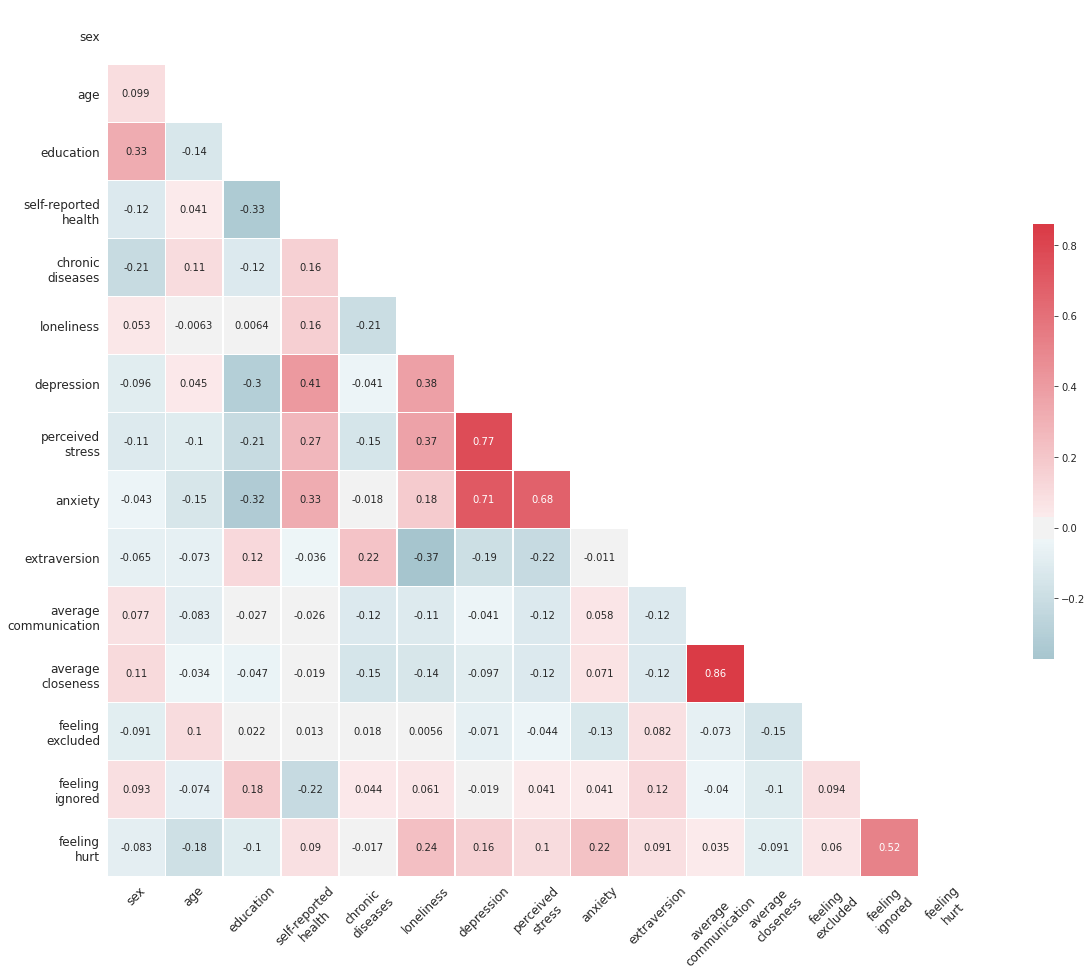

In [ ]:
# correlation heatmap
import matplotlib as mpl

tmp=beh_dat[["sex_m1f0", "age_scan", "edu.x", "subjhealth", "chr_dis", "loneli", "gds_mri", "pss", "gai", "personality_E", "mean_comm", "mean_close", "ex2", "ig2", "sad"]]

labels=["sex", "age", "education", "self-reported\nhealth", "chronic\ndiseases", "loneliness", "depression", "perceived\nstress", "anxiety", "extraversion", 
                              "average\ncommunication", "average\ncloseness", "feeling\nexcluded", "feeling\nignored", "feeling\nhurt"]

corr=tmp.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))

with sns.axes_style('white'):
  plt.figure(figsize = (20,16))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  ax = sns.heatmap(data=corr, linewidths=.1, annot=True, mask=mask, center=0, cmap=cmap, cbar_kws={"shrink": .5}, square=True, xticklabels=labels, yticklabels=labels)
  plt.xticks(rotation=45, fontsize=12)
  plt.yticks(fontsize=12)
  # cb= mpl.colorbar.ColorbarBase(ax, cmap=cmap, boundaries=[-1,1])
  # cb.set_label('Correlation Coefficient')
plt.savefig(f'{results}/heatmap_behvar.png')

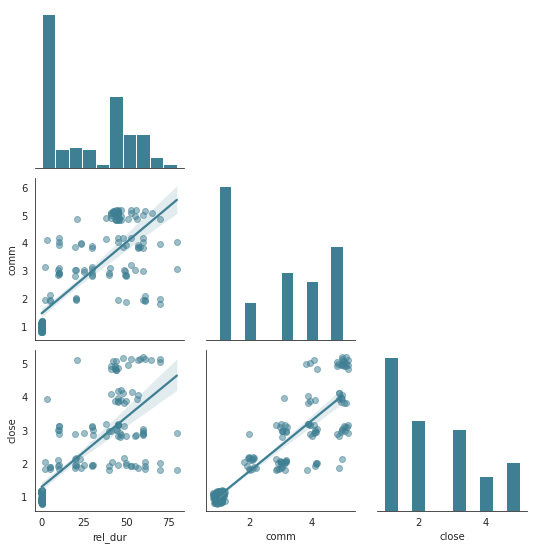

In [ ]:
# correlation scatterplot
with sns.axes_style('white'), sns.diverging_palette(220, 10) as palette:
  g = sns.pairplot(rel_dat, 
                   vars=["rel_dur", "comm", "close"], 
                   kind="reg",
                   corner=True,
                   plot_kws=dict(x_jitter=.2, y_jitter=.2, scatter_kws=dict(alpha=.5), color=palette[0]),
                   diag_kws=dict(color=palette[0]))
  #g.set(xlim=(0,6))

g.savefig(f'{results}/scatterplot_taskrel.png', transparent=True)

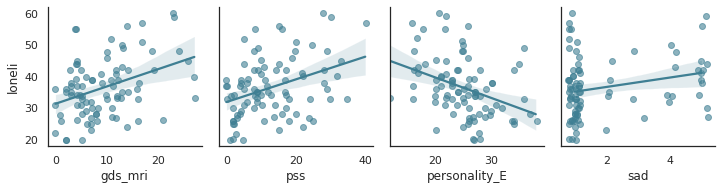

In [ ]:
# correlation scatterplot

with sns.axes_style('white'), sns.diverging_palette(220, 10) as palette:
    g = sns.pairplot(beh_dat, 
                    x_vars=["gds_mri", "pss", "personality_E", "sad"],
                    y_vars=["loneli"],
                    kind="reg",
                    plot_kws=dict(x_jitter=.2, y_jitter=.1, scatter_kws=dict(alpha=.6), color=palette[0]))

g.savefig(f'{results}/scatterplot_lonelicorr.png', transparent=True)

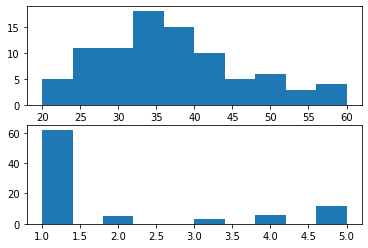

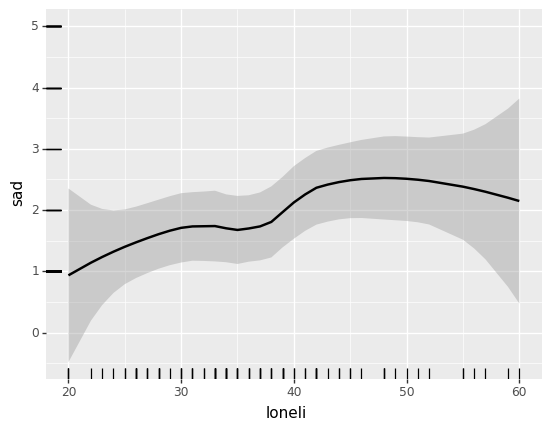

<ggplot: (8738337783009)>

In [ ]:
# check dependencies between variables :  
# plot locally weighted regression(lots of mini regressions) with smoother
# good for looking at univariate relationships BUT interactions may be lost

ax1=plt.subplot(2,1,1)
ax1.hist(beh_dat['loneli'])

ax2=plt.subplot(2,1,2)
ax2.hist(beh_dat['sad'])

from plotnine import *

ggplot(beh_dat, aes('loneli', 'sad'))+stat_smooth(se=True, method='loess')+geom_rug()

In [ ]:
ax1=plt.subplot(3,1,1)
ax1.hist(beh_dat['perceived_exc1'])

ax2=plt.subplot(3,1,2)
ax2.hist(beh_dat['perceived_exc2'])

ax3=plt.subplot(3,1,3)
ax3.hist(beh_dat['perceived_exc3'])

from plotnine import *

print(ggplot(beh_dat, aes('loneli', 'perceived_exc1'))+stat_smooth(se=True, method='loess')+geom_rug())
print(ggplot(beh_dat, aes('loneli', 'perceived_exc2'))+stat_smooth(se=True, method='loess')+geom_rug())
print(ggplot(beh_dat, aes('loneli', 'perceived_exc3'))+stat_smooth(se=True, method='loess')+geom_rug())

In [ ]:
# partial dependence plot
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, X_train, X_train.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, 
                        n_cluster_centers=clusters)
plot_pdp('vox_2243')
plot_pdp('vox_2243', clusters=5)

In [ ]:
# similarity of timepoints
import scipy.spatial.distance as sp_distance

beh_dir = f'{data_path}/beh'
attr_fname = f'{beh_dir}/cb_vars.xlsx'
dat1 = pd.read_excel(attr_fname, names=['sad', 'loneli'])
# dat2 = pd.read_excel(attr_fname)['loneli']

In [ ]:
# beh_mat = pd.DataFrame.join(pd.DataFrame(dat1), pd.DataFrame(dat2))
beh_mat = pd.DataFrame(dat2)
beh_mat.sort_values('loneli')

## Setup ROI Mask

In [ ]:
#  cb_combined rois
# mask_dir = f'{data_path}/roi'      # mask file
# mask_fname = f'{mask_dir}/cb_combined2_bin.nii'    # binary mask
# label_fname = f'{mask_dir}/cb_combined2.nii'        # mask with int labels of roi
# labname_fname = f'{mask_dir}/cb_combined2.txt'      # names of label mask

# social rois combined
#mask_dir = f'{data_path}/roi'      # mask file
#mask_fname = f'{mask_dir}/social_roi16.nii'    # binary mask
#label_fname = f'{mask_dir}/social rois 16 lab.nii'        # mask with int labels of roi
#labname_fname = f'{mask_dir}/social_roi16.txt'      # names of label mask

# social rois separate
mask_dir = f'{data_path}/roi/social roi'     # mask file
mask_list=sorted(glob(f'{mask_dir}/*.nii'))
labname_fname =f'{data_path}/roi/social rois 16 lab.txt'        # mask with int labels of roi
print(mask_list)

# social rois by networks
#mask_dir = f'{data_path}/roi/social network3'
#mask_list=sorted(glob(f'{mask_dir}/*.nii'))
#labname_fname = f'{mask_dir}/social rois 3 lab.txt'  
#print(mask_list)

# others
# poweratlas
# mask_dir = f'{data_path}/roi'      # mask file
# mask_fname = f'{mask_dir}/Mask_Power_264_bin.nii'
# label_fname = f'{mask_dir}/Power_264.nii'  
# labname_fname = f'{mask_dir}/Power_264.txt'

# Shen atlas?

['/gdrive/My Drive/mvpa_dataset/roi/social roi/01Llofc_cb_combined2_-38_24_-21.nii', '/gdrive/My Drive/mvpa_dataset/roi/social roi/02Rofc_cb_combined2_38_34_-18.nii', '/gdrive/My Drive/mvpa_dataset/roi/social roi/03Lamg_cb_combined2_-24_-2_-18.nii', '/gdrive/My Drive/mvpa_dataset/roi/social roi/04Ramg_cb_combined2_27_-1_-19.nii', '/gdrive/My Drive/mvpa_dataset/roi/social roi/05vmpfc_cb_combined2_-3_47_-13.nii', '/gdrive/My Drive/mvpa_dataset/roi/social roi/06dmpfc_cb_combined2_-0_53_28.nii', '/gdrive/My Drive/mvpa_dataset/roi/social roi/07Ripl_cb_combined2_52_-56_24.nii', '/gdrive/My Drive/mvpa_dataset/roi/social roi/08Lipl_cb_combined2_-51_-58_24.nii', '/gdrive/My Drive/mvpa_dataset/roi/social roi/09precu_cb_combined2_2_-55_38.nii', '/gdrive/My Drive/mvpa_dataset/roi/social roi/10Ltp_cb_combined2_-51_-1_-28.nii', '/gdrive/My Drive/mvpa_dataset/roi/social roi/11Rtp_cb_combined2_49_5_-29.nii', '/gdrive/My Drive/mvpa_dataset/roi/social roi/12dacc_cb_combined2_0_16_32.nii', '/gdrive/My Dr


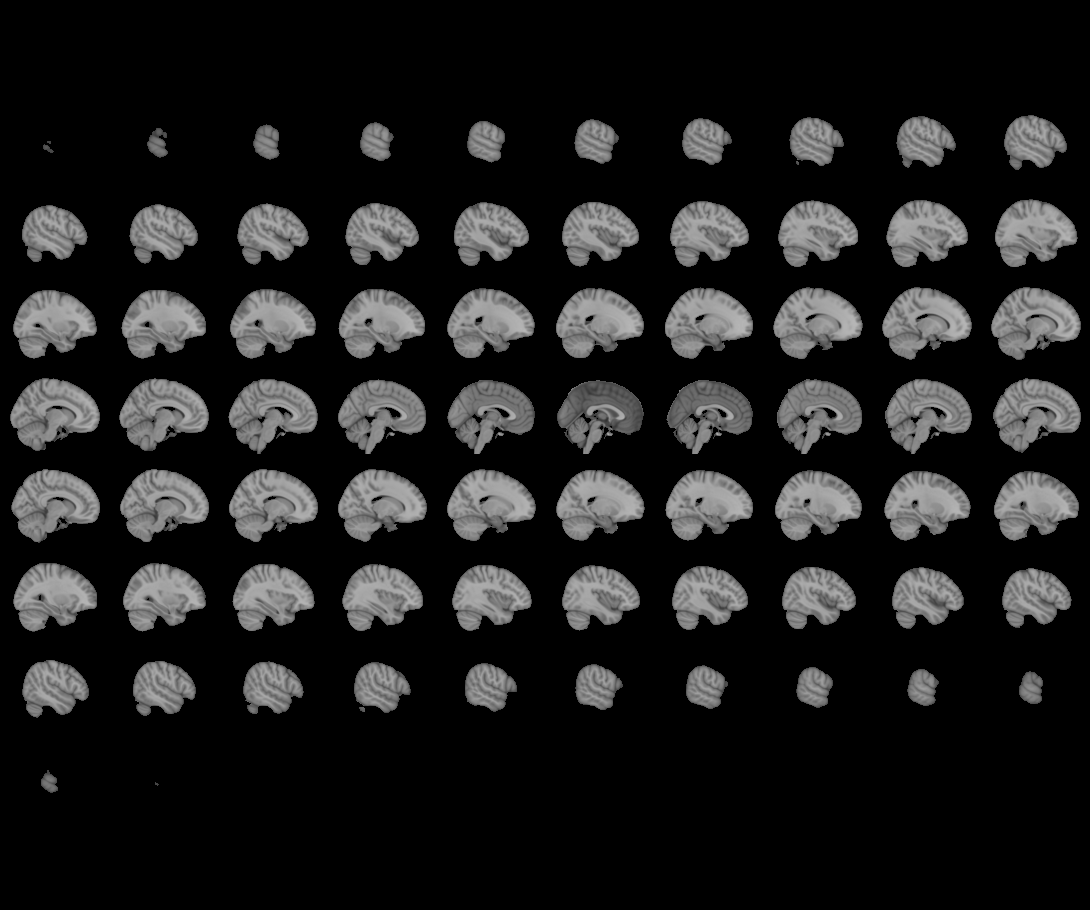
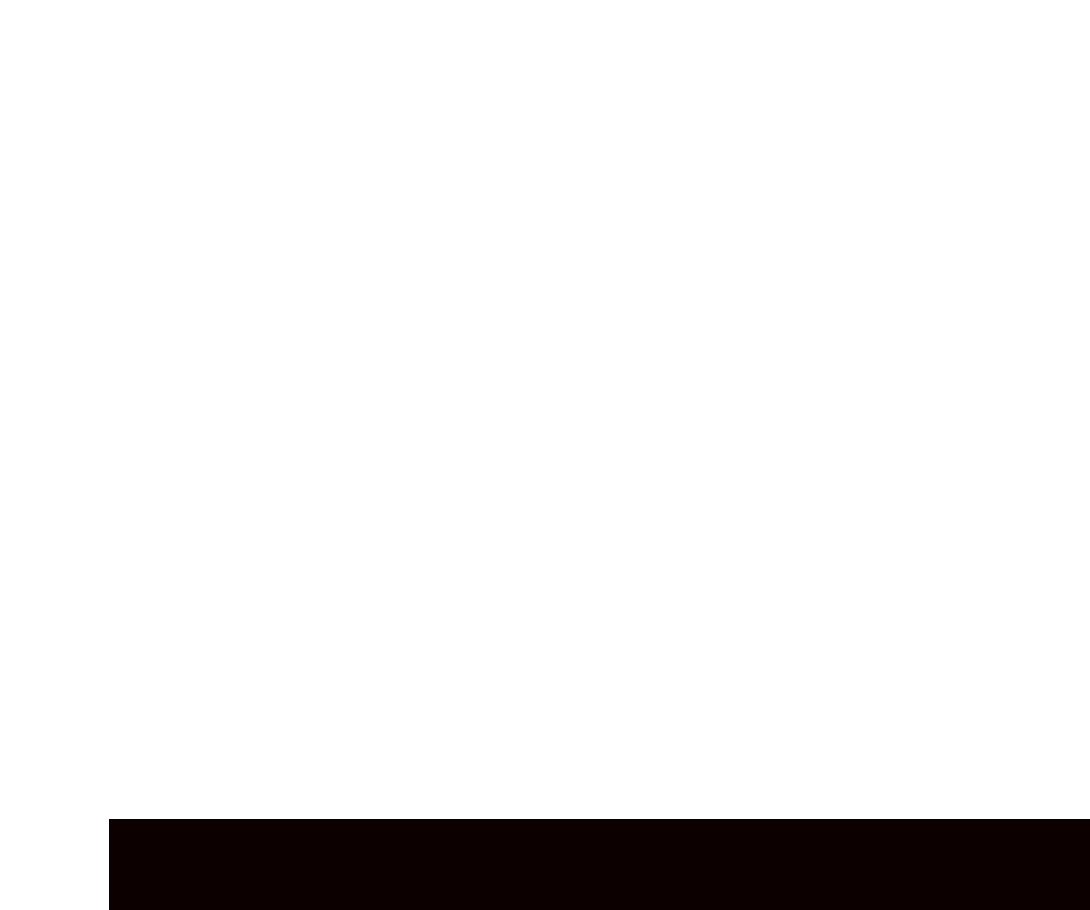

In [ ]:
# Let's check the mask image
plotting.view_img(mask_fname, title='mask image')


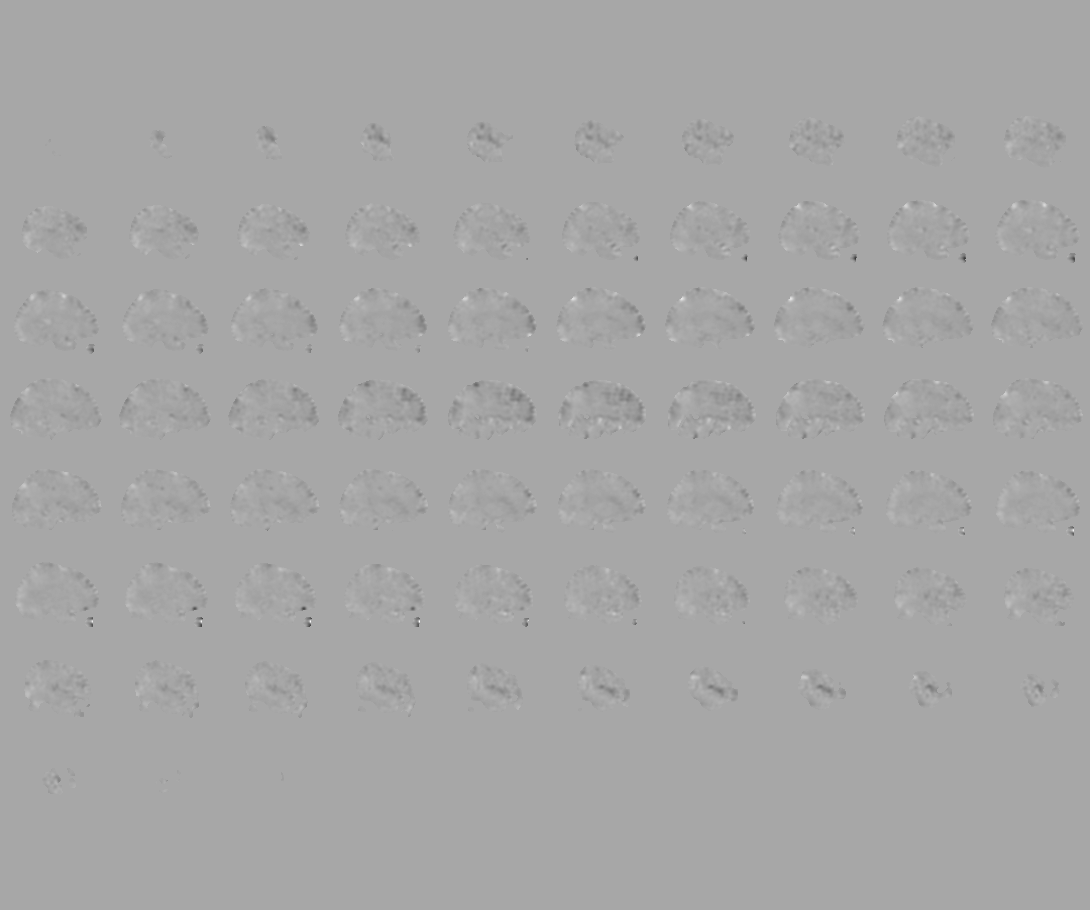
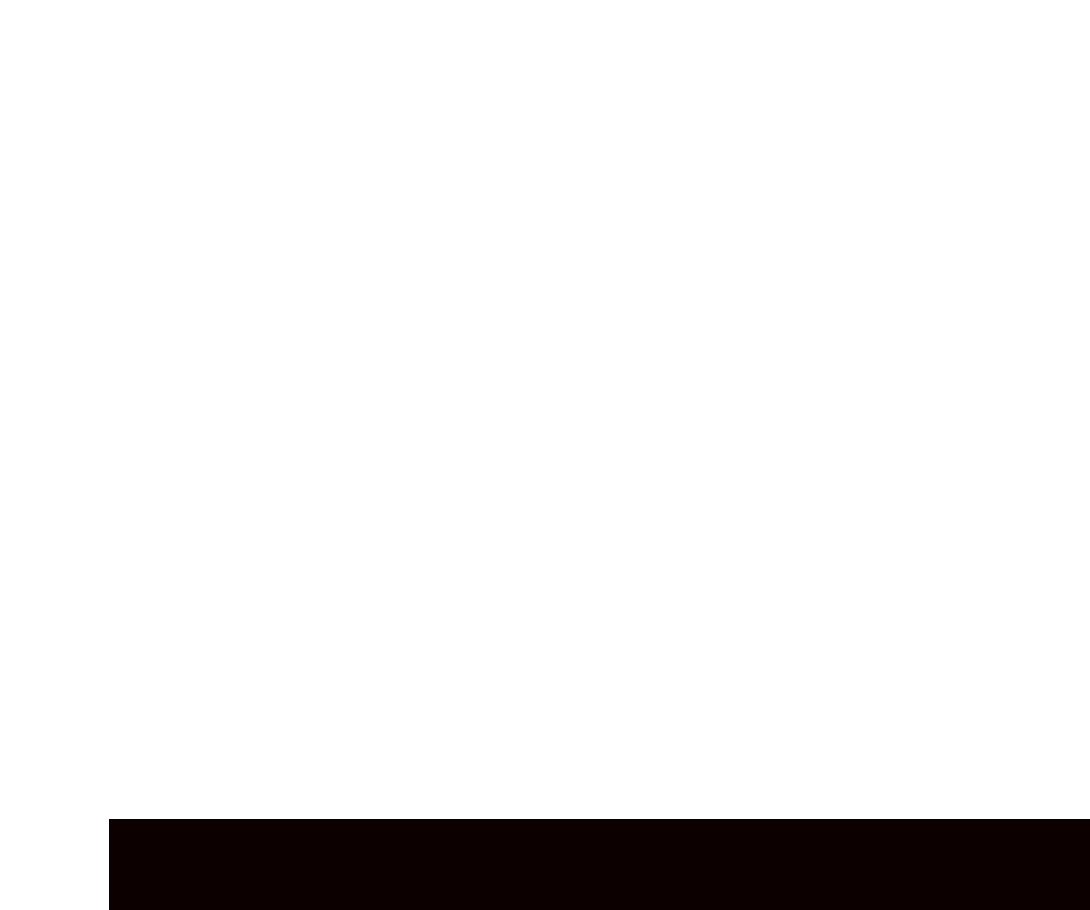

In [ ]:
# Let's check a masked sample image
plotting.view_img(mask_fname, data_x[0],opacity=0.5)

/usr/local/lib/python3.6/dist-packages/nilearn/image/resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))



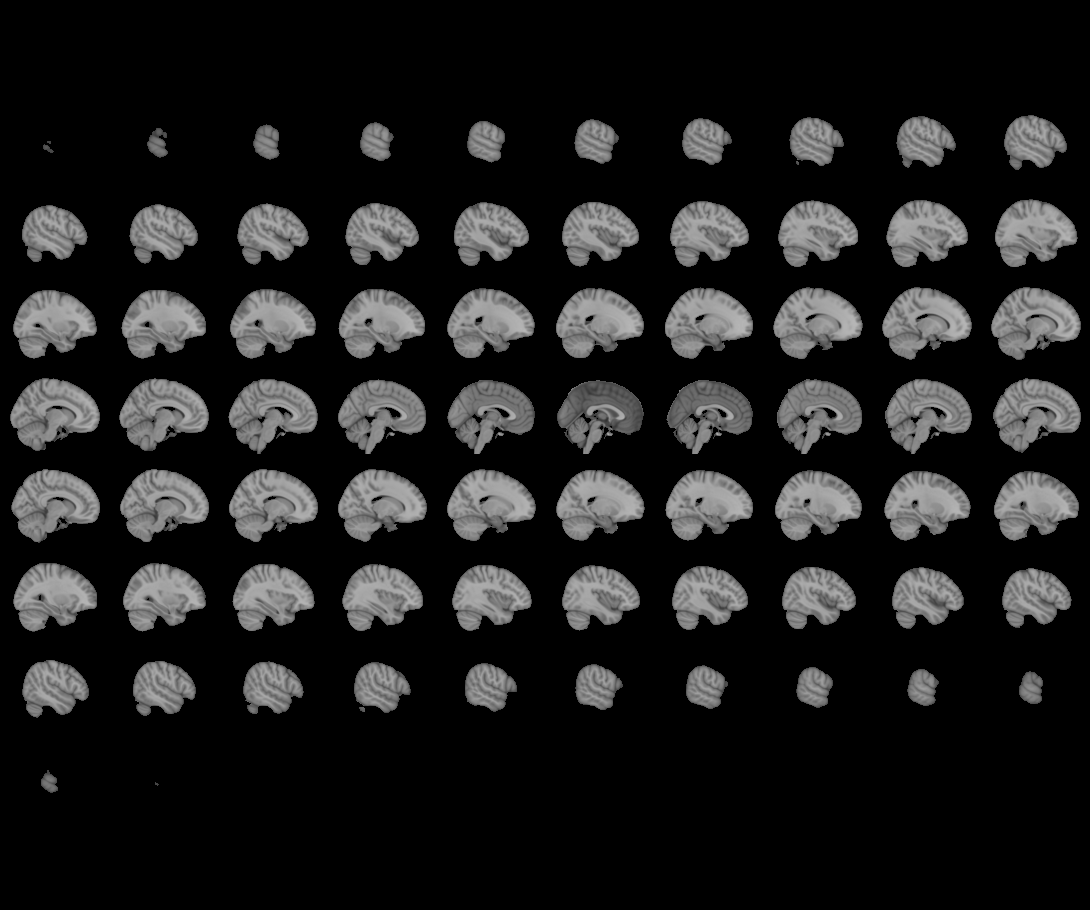
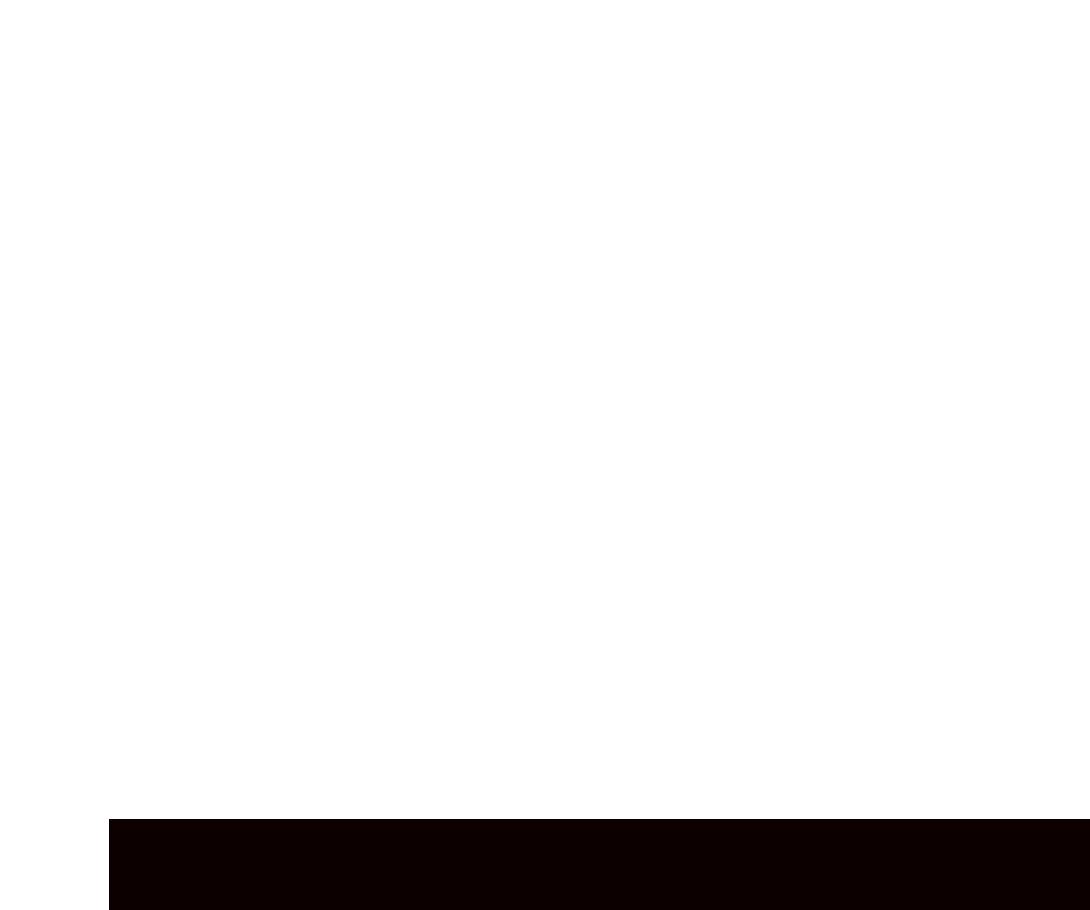

In [ ]:
# calculate background from the border of the image from the sample
tmp=masking.compute_multi_background_mask(data_x)
plotting.view_img(tmp)

/usr/local/lib/python3.6/dist-packages/nilearn/image/resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))



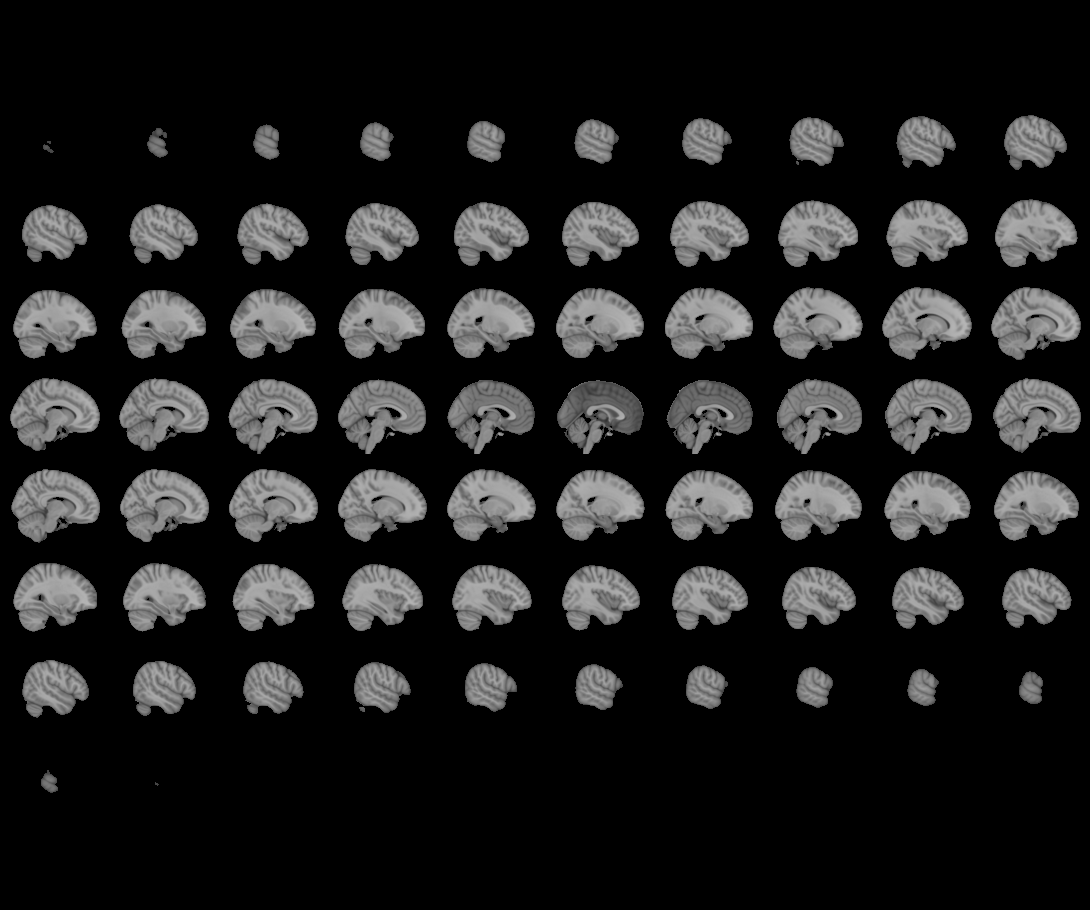
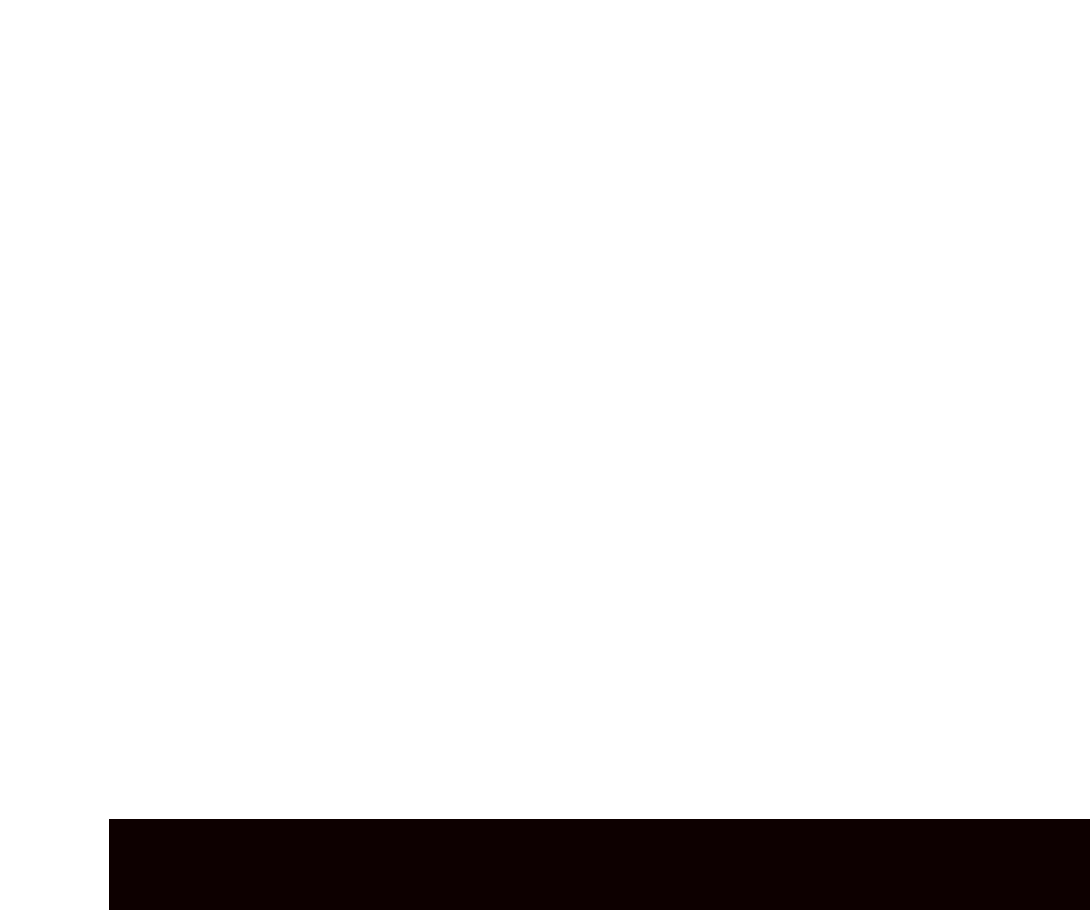

In [ ]:
# calculate gray matter mask from the sample
tmp=masking.compute_multi_gray_matter_mask(data_x)
plotting.view_img(tmp)

### NiftiMasker 
* convert 4D data(3D over time/subjects) into 2D data(voxels/rois over time/subjects)
> $
( x, y, z ) -> [ [ [ z ] * y ] * x ]
$
* extract voxel signals in the area defined by the mask
* can apply basic preprocessing steps :
  * smoothing : FWHMM
  * standardized : samples(time-series) are centered and normed (mean=0, var=1)

   `masker = NiftiMasker(mask_img=mask_fname, standardize=True)`
  * frequency filtering : low / high-pass filters
  * confound removal : linear trends, behavioral info (in transform)
  
    `cov=np.array(covs.get(['mean_comm', 'mean_close']))`

    `fmri_masked = masker.fit_transform(data_x, confounds=cov)`
  * resampling : resize, change resolutions

Notes
* DO NOT standardize now : use scaler when fitting the model


In [ ]:
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker, NiftiMapsMasker

def fit_mask(data, **kwargs):

    # 1) Mask with given nilearn templates : background(calculate brain), template(GM template)
  if 'mask_strategy' in kwargs : masker = NiftiMasker(mask_strategy = kwargs['mask_strategy']) 

  else :
    # 2) Mask with given labeled rois
    # Labels : a single region = set of all voxels that have a common label 
    # single 3D array wirh voxel-wise dict of label numbers
    # BUT regions cannot spatially overlap and are binary(no weighting)
    if 'label' in kwargs : masker = NiftiLabelsMasker(labels_img = kwargs['label'], mask_img=kwargs['mask']) 

    # 3) Mask with given maps
    # Maps : a single region = set of all voxels that have a non-zero weight
    # set of 3D images of regions
    # regions can spatially overlap
    elif 'maps' in kwargs : masker = NiftiMapsMasker(maps_img = kwargs['maps'], resampling_target=None) 
    
    # 4) Mask with a single file : only binary masks
    else : masker = NiftiMasker(mask_img=kwargs['mask'])
  
  masked = masker.fit_transform(data)   

  print('shape of mask :', masked.shape)  
  # check for nan and inf
  print('null values :', masked[pd.isnull(masked)].shape)
  masked[pd.isnull(masked)]=0
  print('infinte values:', masked[~np.isfinite(masked)].shape)
  masked[~np.isfinite(masked)]=0
  # print(masker.generate_report())

  # plotting.plot_roi(masker.mask_img_, image.mean_img(data_x))
  return masked, masker


#### Mask with single file
* single binary mask
* calculate brain / GM maps from the sample
* template brain / GM maps from nilearn
* labels
* maps

In [ ]:
fmri_masked, masker = fit_mask(data_x, mask=mask_fname)
# fmri_masked = fit_mask(data_x, mask_strategy='background')
# fmri_masked = fit_mask(data_x, mask=mask_fname, label=label_fname)
# fmri_masked = fit_mask(data_x, maps= mask_list)

shape of mask : (176, 6573)
null values : (0,)
infinte values: (0,)


#### Mask with voxels : multiple mask files
* multiple binary masks
* use function fit_mask()

In [ ]:
data_x

In [ ]:
fmri_masked=np.empty(shape=[176,0])
num_vox=np.empty(shape=[0,1], dtype=int)

for i, mask_fname in enumerate(mask_list):
  if True:
  #if i!=15 : #and i!=13:
    print(mask_fname)
    fm, _ = fit_mask(data_x, mask=mask_fname)    # standardize=True?
    fmri_masked = np.hstack((fmri_masked,fm))
    num_vox = np.append(num_vox, fm.shape[1])

fmri_masked.shape
num_vox

/gdrive/My Drive/mvpa_dataset/roi/social roi/01Llofc_cb_combined2_-38_24_-21.nii
shape of mask : (176, 432)
null values : (0,)
infinte values: (0,)
/gdrive/My Drive/mvpa_dataset/roi/social roi/02Rofc_cb_combined2_38_34_-18.nii
shape of mask : (176, 123)
null values : (0,)
infinte values: (0,)
/gdrive/My Drive/mvpa_dataset/roi/social roi/03Lamg_cb_combined2_-24_-2_-18.nii
shape of mask : (176, 220)
null values : (0,)
infinte values: (0,)
/gdrive/My Drive/mvpa_dataset/roi/social roi/04Ramg_cb_combined2_27_-1_-19.nii
shape of mask : (176, 248)
null values : (0,)
infinte values: (0,)
/gdrive/My Drive/mvpa_dataset/roi/social roi/05vmpfc_cb_combined2_-3_47_-13.nii
shape of mask : (176, 422)
null values : (0,)
infinte values: (0,)
/gdrive/My Drive/mvpa_dataset/roi/social roi/06dmpfc_cb_combined2_-0_53_28.nii
shape of mask : (176, 1327)
null values : (0,)
infinte values: (0,)
/gdrive/My Drive/mvpa_dataset/roi/social roi/07Ripl_cb_combined2_52_-56_24.nii
shape of mask : (176, 902)
null values :

array([ 432,  123,  220,  248,  422, 1327,  902,  681,  663,  590,  431,
        123,  110,  110,  107,   84])

In [ ]:
print(fmri_masked.shape)
num_vox

(176, 6573)


array([ 432,  123,  220,  248,  422, 1327,  902,  681,  663,  590,  431,
        123,  110,  110,  107,   84])

In [ ]:
# trash
img=nib.load(data_x[50]); 
d=img.get_fdata()
print(d.shape)
dr=d.ravel()
dr.shape

a=np.array([[[1,3,4]],[[9,11,6]]])
# a=np.array([[1,2],[3,4]]) #,[[5,6],[7,8]]],[[[9,10],[11,12]],[[13,14],[15,16]]])
print(a.shape)
np.ravel(a)

(91, 109, 91)


(902629,)

## Align fmri data between subjects
* hyperalignment
* shared response model

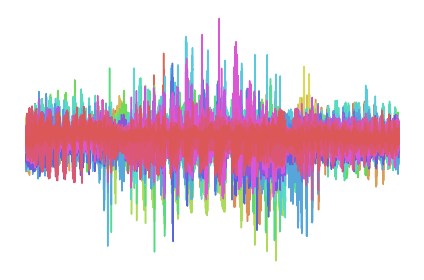

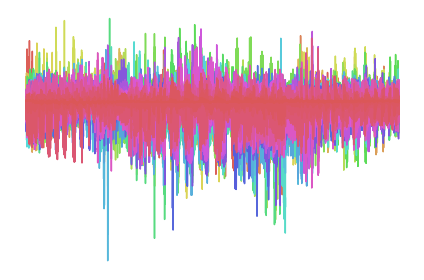

In [ ]:
!pip install hypertools
import hypertools as hyp

data=list()

for i in range(len(fmri_masked)):
  data.append(fmri_masked[i].reshape(-1,1))

hyp.plot(data)

# hyperalignment
aligned_data = hyp.align(data, align='hyper')

# shared response model
# aligned_data = hyp.align(data, align='SRM')

hyp.plot(aligned_data)

In [ ]:
fmri_masked=np.array(aligned_data).squeeze(axis=2)
fmri_masked.shape

(88, 6573)

## Setup Data Structure
* transform inputs and labels into a single dataframe of shape 
[number of samples x (number of features + 1 label)]

* if necessary, scale the data (feature scaling)

In [ ]:
def fmri_loader(masked_input, **kwargs):
   
   # DataFrame of fmri images
  if isinstance(masked_input, pd.DataFrame) == True : 
    print('already dataframe')
    df_fmri=masked_input
  else : 
    print('change to dataframe')
    df_fmri=pd.DataFrame(masked_input) 
  
  print('fmri data :', df_fmri.shape, 'min values :', df_fmri.min().min(), 'max values :', df_fmri.max().max())
  
  # Change column names
  if 'colnames' in kwargs :
    # voxels
    if kwargs['colnames']=='v': df_fmri.columns = [f'vox{i+1}' for i in df_fmri.columns]   
    # ROIs
    else : 
      labname=pd.read_csv(kwargs['colnames'], header=None)
      df_fmri.columns = [labname[0][roi]+f'_vox{i+1}' for roi in range(len(labname)) for i in range(num_vox[roi])]

  # Dataframe of fmri images + predicting variable
  if 'labels' in kwargs :
    print('target data :', kwargs['labels'].shape)
    df_fmri=df_fmri.assign(target=kwargs['labels'])
    # %time df_fmri.describe(include='all')

  if 'groups' in kwargs :
    # label subjects
    print('groups :', kwargs['groups'].shape)
    df_fmri=df_fmri.assign(groups=kwargs['groups'])
  
  return df_fmri

In [ ]:
# 1) if you want a dataframe of fmri data & behavioral data
# df_fmri_masked=fmri_loader(fmri_masked, colnames='v', labels = data_y)

# 2) if you want a dataframe of just the fmri data
# df_fmri_masked = fmri_loader(fmri_masked, colnames=True)

# 3) if you want a dataframe of fmri data with labels & target 
#df_fmri_masked=fmri_loader(fmri_masked, colnames=labname_fname, labels = data_y)

# 4) if you want a dataframe of fmri data with labels & target & groups
data_y=np.hstack((np.repeat(1,88), np.repeat(-1,88)))
groups=np.hstack((np.arange(1,89), np.arange(1,89)))
df_fmri_masked=fmri_loader(fmri_masked, colnames=labname_fname, labels = data_y, groups=groups)

df_fmri_masked.head()

change to dataframe
fmri data : (176, 6573) min values : -24.678098678588867 max values : 23.79314613342285
target data : (176,)
groups : (176,)


L_lOFC_vox1  L_lOFC_vox2  L_lOFC_vox3  ...  R_nacc_vox84  target  groups
0          0.0     -0.69363    -0.614225  ...     -1.647672       1       1
1          0.0      0.00000     0.000000  ...     -3.522779       1       2
2          0.0      0.00000     0.000000  ...      1.741074       1       3
3          0.0      0.00000     0.000000  ...     -1.399377       1       4
4          0.0     -1.67897    -2.051648  ...     -1.912547       1       5

[5 rows x 6575 columns]

In [ ]:
# Model predicting conditions E vs I

# label conditions : Exc 1, Inc -1
data_y=np.hstack((np.repeat(1,88), np.repeat(-1,88)))
# df_fmri_masked=fmri_loader(fmri_masked, colnames=True, labels = data_y)

# maybe for two value output [1,0] vs [0,1]
# data_y=np.vstack((np.repeat([[1, 0]],88, axis=0), np.repeat([[0, 1]],88, axis=0)))

df_fmri_masked = pd.read_feather(f'{data_path}/dataframes/df_predcond_model')

# label subjects
groups=np.hstack((np.arange(1,89), np.arange(1,89)))
df_fmri_masked=df_fmri_masked.assign(groups=groups)

df_fmri_masked.head()
%time df_fmri_masked.describe(include='all')

CPU times: user 13.1 s, sys: 25.9 ms, total: 13.1 s
Wall time: 13.1 s


vox1        vox2        vox3  ...     vox6573      target      groups
count  176.000000  176.000000  176.000000  ...  176.000000  176.000000  176.000000
mean    -0.173509   -0.236294   -0.228794  ...   -0.163165    0.000000   44.500000
std      0.869325    0.826530    0.778564  ...    0.812037    1.002853   25.474245
min     -6.813576   -4.798133   -4.615603  ...   -5.471888   -1.000000    1.000000
25%      0.000000    0.000000    0.000000  ...   -0.285491   -1.000000   22.750000
50%      0.000000    0.000000    0.000000  ...    0.000000    0.000000   44.500000
75%      0.000000    0.000000    0.000000  ...    0.000000    1.000000   66.250000
max      3.872671    2.372625    1.300280  ...    3.270601    1.000000   88.000000

[8 rows x 6575 columns]

In [ ]:
# save dataframe as feather
# os.makedirs(f'{data_path}/dataframes')
# df_fmri_masked.to_feather(f'{data_path}/dataframes/df_predcond_model')

# read feather of data
df_fmri_masked = pd.read_feather(f'{data_path}/dataframes/df_predcond_model')

### Draw Plots

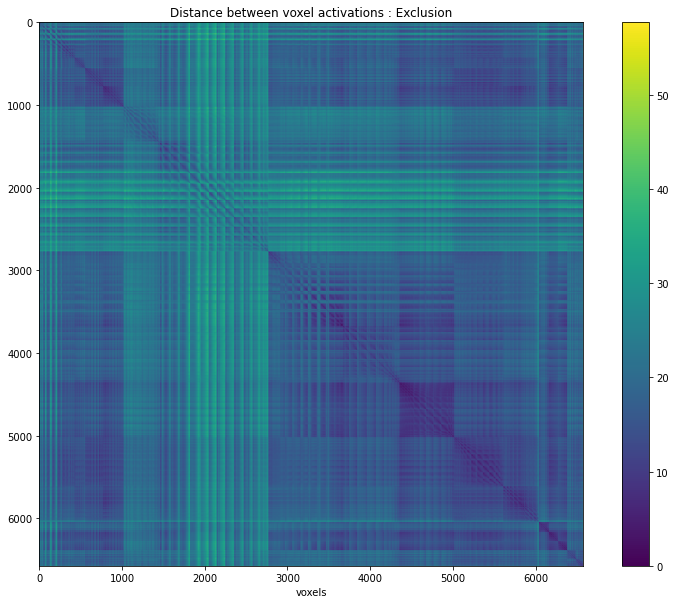

In [ ]:
import scipy.spatial.distance as sp_distance

#dat = pd.concat([fmri_loader(d1), fmri_loader(d2)], axis=0, ignore_index=True)

dat=df_fmri_masked.drop(['target', 'groups'],axis=1).iloc[:][:88].transpose()

dist_mat = sp_distance.squareform(sp_distance.pdist(dat))
plt.figure(figsize=(14,10))
plt.title('Distance between voxel activations : Exclusion')
plt.xlabel('voxels')
#plt.ylabel('voxels')
plt.imshow(dist_mat, cmap='viridis')
plt.colorbar()

plt.savefig(f'{results}/distanceplot_exc.png')

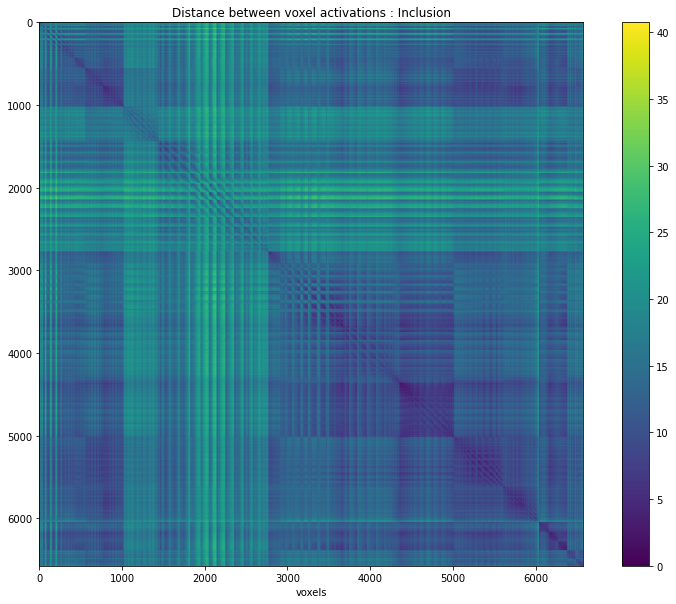

In [ ]:
import scipy.spatial.distance as sp_distance

#dat = pd.concat([fmri_loader(d1), fmri_loader(d2)], axis=0, ignore_index=True)
#dat=df_fmri_masked.drop(['target', 'groups'],axis=1).iloc[:][:88].mean(axis=0)
dat=df_fmri_masked.drop(['target', 'groups'],axis=1).iloc[:][88:].transpose()
dist_mat = sp_distance.squareform(sp_distance.pdist(dat))
plt.figure(figsize=(14,10))
plt.title('Distance between voxel activations : Inclusion')
plt.xlabel('voxels')
#plt.ylabel('Exc(0-87), Inc(88-175)')
plt.imshow(dist_mat, cmap='viridis')
plt.colorbar()

plt.savefig(f'{results}/distanceplot_inc.png')

In [ ]:
# Dataframe of beh vars
df_beh=pd.DataFrame(beh_dat)

%time df_beh.describe(include='all')

y_train=df_beh['loneli']
X_train=df_beh.drop(['loneli', 'lonecat3', 'lonef1', 'lonef2', 'lonef3'], axis=1)

%time X_train.describe(include='all')

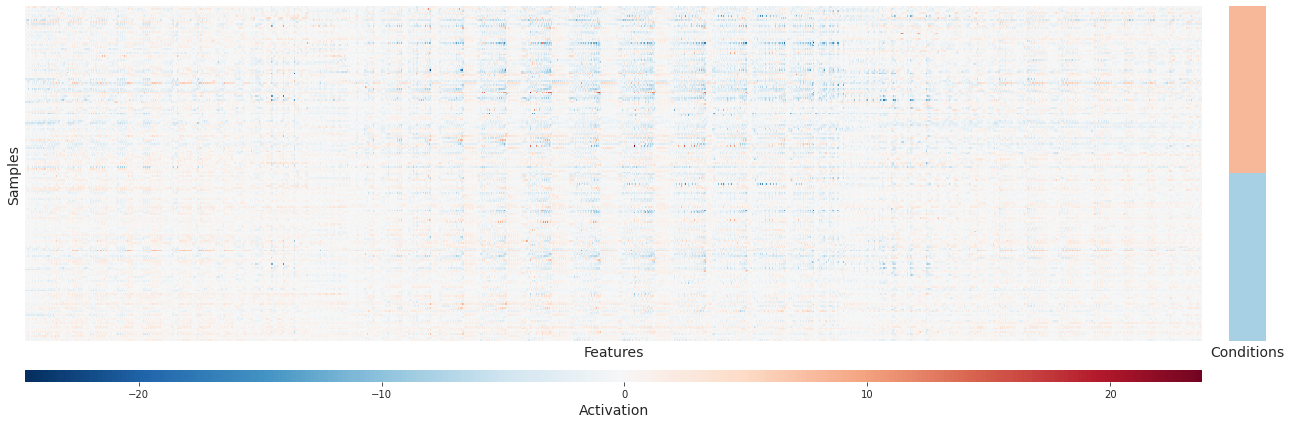

In [ ]:
import matplotlib.gridspec as gridspec
# sort df by sad group
#df_sorted = df_fmri_masked.sort_values('target', ascending=False)
grp = np.array(df_fmri_masked['target']).reshape(-1,1)
#df_sorted.iloc[:,:-1]

# Plot Feature matrix of standardized activations
with sns.axes_style('white'):
  plt.figure(figsize=(18,6))
  gs = gridspec.GridSpec(10,20) 
  hm_ax = plt.subplot(gs[:9, :19])
  cbar_ax = plt.subplot(gs[9, :19])
  grp_ax = plt.subplot(gs[:9, 19])

  sns.heatmap(df_fmri_masked.drop(['target', 'groups'], axis=1), ax=hm_ax, cbar_ax=cbar_ax, cmap="RdBu_r", center=0,
                   cbar_kws={'label':'Activation',  'orientation': 'horizontal'},
                   xticklabels= False, yticklabels=False)
  hm_ax.set_xlabel('Features',  fontsize=14)
  hm_ax.set_ylabel('Samples',  fontsize=14)
  
  cbar_ax.set_xlabel('Activation', fontsize=14)
  sns.heatmap(grp, ax=grp_ax, xticklabels=False, yticklabels=False, cmap=sns.color_palette("RdBu_r", 2), cbar=False)
  grp_ax.set_xlabel('Conditions', fontsize=14)
  plt.tight_layout()
# plt.savefig(os.path.join(results,'feat_matrix.png'))

In [ ]:
# Plot Feature matrix of standardized activations : sort sample into sad groups
with sns.axes_style('white'):
  plt.figure(figsize=(40,20))
  grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
  f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(30,10))
  ax = sns.heatmap(df_fmri_masked, ax=ax, cbar_ax=cbar_ax, cmap="RdBu_r", center=0,
                   cbar_kws={'label':'Activation','orientation': 'horizontal'},
                   xticklabels= False, yticklabels=False)
  ax.set_xlabel('Features',  fontsize=14)
  ax.set_ylabel('Samples',  fontsize=14)

# f.savefig(os.path.join(results,'feat_matrix.png'))

In [ ]:
# check outliers
plt.hist(df_fmri_masked[:][6320])

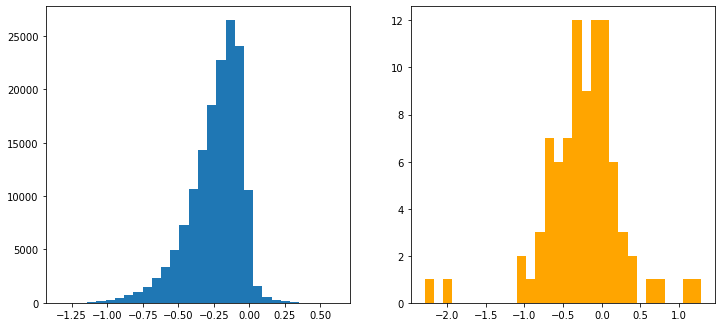

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(221)
# check average activations of voxels
mean_vox=fmri_masked.mean(axis=0)
plt.hist(mean_vox, bins=30)

plt.subplot(222)
# check average activations of subjects
mean_sbj=fmri_masked.mean(axis=1)
plt.hist(mean_sbj, bins=30, color='orange')

plt.savefig(f'{results}/conE-I_meanact_graph.png')

## Use Brain_Data class to organize data

* data – nibabel data instance or list of files
* Y – Pandas DataFrame of training labels
* X – Pandas DataFrame Design Matrix for running univariate models (image metadata)
* mask – binary nifiti file to mask brain data
> creates NiftiMasker (nilearn) and data is fit & transformed with mask
* output_file – Name to write out to nifti file
* **kwargs – Additional keyword arguments to pass to the prediction algorithm

In [ ]:
bdata = Brain_Data(data=data_x, Y=pd.DataFrame(data_y), mask=mask_fname)

In [ ]:
# Transform Brain_Data class to 4D nifti file : visualize
# same as masker.inverse_transform() in nilearn
bdata.to_nifti()    

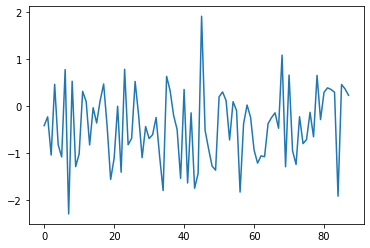

In [ ]:
# Let's plot the mean to see global signal differences between subjects
plt.plot(bdata.data.mean(axis=1))

In [ ]:
svm_stats = bdata.predict(algorithm='svm', cv_dict={'type': 'kfolds', 'n_folds': 5, 'stratified': 'Y'})
                          **{'kernel': "linear"})

# Classification analysis

## 1) Define a Classifier

### Support Vector Machine(SVM)
* not scale invariant : highly recommended to scale data
* loss function = squared_hinge
#### Hyperparameters
* C : soft margin constant. a large value of C gives a large penalty to errors/margin errors
* kernel parameters : (linear는 없음), polynomial, Gaussian...
  * Gamma : only for non-linear hyperplanes
  * degree : only for polynomial kernels


  > For 2-D space kernels(polynomial, Gaussian), use grid-search

In [ ]:
# classification
from sklearn.svm import SVC

# L2-reg : C
m=SVC(C=1.0, kernel='linear', max_iter=-1, verbose=True, probability =True) 

# optional : balance for classes
# m=SVC(C=0.01, kernel='linear', class_weight='balanced', probability =True)

In [ ]:
from sklearn.svm import LinearSVC    # can implement regularization

m=LinearSVC(C=1.0, penalty='l2', max_iter=4000, verbose=1, loss='hinge')    # tuned

#m=LinearSVC(C=1.0, penalty='l1', max_iter=2000, dual=False)   
# adjust weights inversely proportional to class frequencies in input data

In [ ]:
# classification : multiclass
from sklearn.svm import LinearSVC
m=LinearSVC(C=1.0, penalty='l2', multi_class='crammer_singer', max_iter=1000, verbose=1)    # default

In [ ]:
# regression
from sklearn.svm import SVR

m=SVR(C=1.0, kernel='linear')

### Random Forest
* high parameter, highly flexible functional form, with few if any statistical assumptions
* split = decision
* Each tree : try every possible split of values for every possible variable and choose the splits with the best classification (using criteria such as MSE of predicting the average of split group)
* Forest of trees : bagging(bootstrap aggregation) tree models 
> **Create different models each of which is only somewhat predictive but the models give predictions that are not correlated with each other(less overlap of datapoints).** That would mean that the five models would have profound different insights into the relationships in the data. And the errors of those models are random. If you took the average of those models, you are effectively bringing in the insights from each of them **b/c the errors would be averaged out to 0 and what is left is the true relationship.** Since this is bootstrapping out of the whole sample, sklearn picks out n rows with replacement for each tree.
> * The more important thing seems to be creating uncorrelated trees rather than more accurate trees. In scikit-learn, there is another class called *ExtraTreesClassifier* which is an extremely randomized tree model. Rather than trying every split of every variable, it randomly tries a few splits of a few variables which makes training much faster and it can build more trees — better generalization.
* Reduce overfitting :
1. Subsampling : rather than bootstrapping the entire set of rows, just randomly sample a subset of the data per tree. That way, given enough trees, the model can still see all the data, but for each individual tree it'll be just as fast as if we had cut down our dataset.
> set_rf_samples()
2. min_samples_leaf : the minimum number of rows in every leaf nodes decides how deep the tree will grow
> higher the number = less decision rules for each leaf node(generalize better) and predictions are made by averaging more rows in the leaf node(less volatility)
* this model is more fit for situations where each feature has its own contributing meaning to the decision that the tree makes.


#### Hyperparameters

* n_estimators : number of trees in the forest (results will stop getting better beyond a certain point)
* max_features : number of features to consider at each split (None, 0.5, sqrt, log2)
> It definitely can give us more variation and therefore it can help us to create more generalized trees that have less correlation with each other even though the individual trees probably won’t be as predictive.
* min_samples_leaf : (1, 3, 5, 10, 25, 100…). In practice, the number of leaf nodes = number of rows(every possible target value)
* OOB : If you don’t have a validation set, then this allows you to get kind of a quasi validation set for free.


In [ ]:
# make instance of classifier
m = RandomForestClassifier(n_estimators=20, max_features="sqrt", min_samples_leaf=1, n_jobs=-1, oob_score=True, class_weight="balanced_subsample")    
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
# The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

# scoring metric
#  AUC restricted for binary classes
scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy'}

In [ ]:
m = ExtraTreesClassifier(n_estimators=100, max_features="sqrt", n_jobs=-1)

In [ ]:
# make instance of regressor
m = RandomForestRegressor(n_estimators=20, max_features=None, min_samples_leaf=1, n_jobs=-1, oob_score=True)

# scoring metric
from sklearn.metrics.scorer import make_scorer, accuracy_score
scoring = {'r2': 'r2'}

In [ ]:
m.get_params()
m.decision_path

In [ ]:
set_rf_samples(50)
# m = RandomForestClassifier(n_estimators=20, max_features="sqrt", min_samples_leaf=1, n_jobs=-1, class_weight="balanced_subsample")  
m = RandomForestRegressor(n_estimators=20, max_features=None, min_samples_leaf=1, n_jobs=-1)

# reset_rf_samples()

### Other Linear classifiers
####1. Linear Regression
* predicts the target y as a weighted sum of the feature inputs, betas(coef) represent the learned feature weights, use ordinary least squares method to find the weights that minimize the squared differences between actual and estimated outcomes
* linearity makes the feature weights easy to understand, estimated weights come with confidence intervals
* Whether the model is the “correct” model depends on whether the relationships in the data meet certain assumptions, which are linearity, normality, homoscedasticity, independence, fixed features, and absence of multicollinearity.

 ![](https://drive.google.com/uc?export=view&id=14AF9SFd7cW_j6m_-vjnHO7NQ-A-DRvV7)

* Interpretation : 
>* **feature** = an increase of feature x by one unit **increases the prediction for y by weight(beta)** units, when all other feature values remain fixed
>* adjusted R-squared tells you how much of the total variance of your target outcome is explained by the model (accuracy) when accounting for the number of features
>* feature importance = absolute value of t-statistic (estimated weight scaled with standard error)
>* the linear additivity isolated interpretation of individual feature effect from all other features but ignores the joint distribution of features
>* **effect(weight&value)** shows how much the combination of weight and feature(weighted sum/linear predictor) contributes to the predictions in your data
>* => for instance-specific effects you must compare with distribution of effect for each feature(e.g. the predicted value is low because certain features are lower than average)
>* more meaningful when the features are mean centered( feature effects explain the contribution to the predicted outcome contrastive to the mean-instance) and sparse(less features make the model selective)

#### 2. LogisticRegression
* probabilistic model
* transforms its output using the logistic sigmoid function to return a probability value (squeeze the output of a linear equation between 0 and 1)
* a GLM that assumes a Bernoulli distribution and uses the logit function as the link function. The mean of the binomial distribution used in logistic regression is the probability that y is 1.
* odds(Y) = likelihood that Y will occur = probability of Y / (probability of no Y) = Not Y에 비해 Y일 확률이 몇배인지 ( 0 이상 )
* log odds = log(odds) ( ~ )
* odds ratio = odds(Y) of A / odds(Y) of B = B에 비해 A일 때 Y의 가능성이 몇배인지 (1미만=negative, 1이상=positive relationship)

![](https://drive.google.com/uc?export=view&id=1TK8uceD6gF8u4f-TxykYGYHpxo0zd0Ri)

![](https://drive.google.com/uc?export=view&id=1cZJOyxcbSN9SQjpHkCxRSY66NYQalMO2)


![](https://drive.google.com/uc?export=view&id=1Pfru7Z2-TAKk5yjW-70csfUodXMC2ZAJ)

* parameters : C = lower C, more regularization

* Interpretation :
>* the weighted sum is transformed by the logistic function to a probability
>* logreg model is a linear model for the log odds
>* **feature** = a change in a feature x by one unit **changes the odds ratio() by exp(weight) units** (by multiplying the odds by exp(weight)= the likelihood of y increases by exp(weight) times), when all other features remain the same
>* **effect (weight*value)** shows how much the combination of weight and feature contributes to the log odds(= the log likelihood that X will occur)
>* more difficult b/c weights are multiplicative not additive : increasing of a feature multiplies the y
>* complete separation= if a single feature perfectly separates the two classes, logreg can no longer be trained b/c that weight would not converge

#### 3. Regularized linear models
* with stochastic gradient descent (SGD) learning
* L1 : LASSO (penalize large weights, L1-norm gives many of the weights an estimate of 0 and shrinks the others, sparse coding)
* L2 : Ridge (makes everything smaller, correlated features shrink together)
* ElasticNet = Ridge + Lasso



In [ ]:
# Classification
# add optional regularization : l1, l2(default), elasticnet
from sklearn.linear_model import LogisticRegression
m = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)    # L2(Default)
 
# m = LogisticRegression(penalty='l2', C=0.1, class_weight='balanced', solver='lbfgs')    # L2 tuned

# m = LogisticRegression(penalty='elasticnet', l1_ratio =0.5, C=1.0, class_weight='balanced', solver='saga')    # elasticnet tuned
# m = LogisticRegression(penalty='none', C=1.0, class_weight='balanced', solver='lbfgs') 

# m = LogisticRegression(penalty='l1', C=10.0, class_weight='balanced', solver='liblinear')
# m = LogisticRegression(penalty='l1', C=100.0, class_weight='balanced', solver='liblinear')    # L1 tuned

In [ ]:
# Classification : multiclass
# add optional regularization : l1, l2(default), elasticnet

from sklearn.linear_model import LogisticRegression
# m = LogisticRegression(penalty='l2', C=1.0, max_iter=100, solver='lbfgs')    # L2(Default)

m = LogisticRegression(penalty='l2', C=1.0, max_iter=100, solver='liblinear', multi_class="multinomial", dual=True)

# m = LogisticRegression(penalty='elasticnet', l1_ratio =0.5, C=1.0, class_weight='balanced', solver='saga')    # elasticnet tuned
# m = LogisticRegression(penalty='none', C=1.0, class_weight='balanced', solver='lbfgs') 

# m = LogisticRegression(penalty='l1', C=10.0, class_weight='balanced', solver='saga')

In [ ]:
from sklearn.linear_model import SGDClassifier,RidgeClassifier

# m = RidgeClassifier(alpha=0.001, class_weight='balanced')   #{-1: 0.05, 1: 0.95})     # L2
m = RidgeClassifier(alpha=1.0, class_weight='balanced')   #{-1: 0.05, 1: 0.95})     # L2

# m = SGDClassifier(penalty='elasticnet', l1_ratio =0.15, max_iter=1000, tol=1e-3, n_jobs=-1, class_weight ='balanced' )

In [ ]:
# Regression
# sparse signals
from sklearn.linear_model import ElasticNet, Lasso, Ridge
# m = ElasticNet(alpha =1.0, l1_ratio=0.5)

# m = Lasso(alpha =1.0)

m = Ridge(alpha=1.0)    # L2

### Dummy classifier for chance level
* simple baseline to compare with real classifiers
* use its performance scores as chance level performance scores

In [ ]:
from sklearn.dummy import DummyClassifier

dum = DummyClassifier(strategy='stratified', random_state=None)


### !Pipeline for preprocessing

#### Classifiers

In [ ]:
# pipeline : feature scaling - model
# use when splitting train & test set, CV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

m = make_pipeline(preprocessing.StandardScaler(), m)


In [ ]:
# pipeline : feature scaling - resampling - model
# Resampling for imbalanced classes
from imblearn.pipeline import make_pipeline
from sklearn import preprocessing
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SVMSMOTE, SMOTE
from collections import Counter

sampling = SMOTETomek(smote=SMOTE(k_neighbors=2), random_state='None')

# check oversampled data
X_train_oversampled, y_train_oversampled = sampling.fit_sample(X_train, y_train)
print(sorted(Counter(y_train_oversampled).items()))

m = make_pipeline(preprocessing.StandardScaler(), sampling, m)



## NAN values after cross validation

[(-1, 62), (1, 62)]


#### Dummy classifier

In [ ]:
# pipeline : feature scaling - model
# use when splitting train & test set, CV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

dum = make_pipeline(preprocessing.StandardScaler(), dum)


In [ ]:
# pipeline : feature scaling - resampling - model
# Resampling for imbalanced classes
from imblearn.pipeline import make_pipeline
from sklearn import preprocessing
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SVMSMOTE

sampling = SMOTETomek()

dum = make_pipeline(preprocessing.StandardScaler(), sampling, dum)


### Performance Metrics
Classification
* accuracy
* rmse
* confusion matrix
* ROC curve & AUC

Regression
* r2 : how much more the model predicts compared to predicting the mean 
> predicts perfectly = 1, predicts the mean = 0, worse than predicting the mean <0
* explained variance

Random Forest
* OOB : average performance of trees where a individual sample(row) was not used to train but used to validate.
> OOB score will generally underestimate the generalizability of a model BUT but the more trees you add, the less serious that underestimation is.
> This is a useful metric for tuning hyperparameters

cf. To test the relative accuracy of our 6 learning models, all of them were compared to a base rate classifier, which overly simplifies the model to classify 100% of the sample as having FM. 


Overfitting
* Even when your model has not fully memorized all your data, earlier on in training it may have memorized certain parts of it. As a result, the longer you train for, the better your accuracy will get on the training set; and the validation set accuracy will also improve for a while, but eventually it will start getting worse, as the model starts to memorize the training set, rather than finding generalizable underlying patterns in the data. When this happens, we say that the model is over-fitting.


#### Accuracy




In [ ]:
# Classification
def rmse(x,y): return math.sqrt(((x-y)**2).mean())


In [ ]:
# Prediction scores for all data
def print_score(m):
    res = [m.score(X_train, y_train),
           rmse(m.predict(X_train), y_train)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print("accuracy (chance level : %0.2f),rmse, oob_score : " % (1. / len(y_train.unique())), res)

import statsmodels.stats.api as sms

In [ ]:
# Prediction scores for split data
def print_score(m):
    res = [m.score(X_train, y_train), m.score(X_test, y_test),
           rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print("accuracy (chance level : %0.2f ),rmse, oob_score : " % (1. / len(data_y.unique())), res)
    
import statsmodels.stats.api as sms

In [ ]:
# Regression
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

# Prediction scores for all data
def print_score(m):
    res = [m.score(X_train, y_train),
           rmse(m.predict(X_train), y_train)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print("R2, rmse, oob_score : ", res)

# print_score(m)

# explained variance
from sklearn.metrics import explained_variance_score
# print("Explained variance : ", explained_variance_score(y_train, m.predict(X_train)))

import statsmodels.stats.api as sms

#### ROC curve and AUC

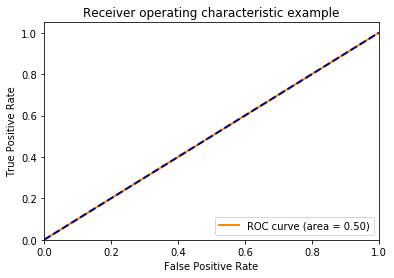

In [ ]:
# ROC for binary classes
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, m.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#  ROC for multiclass
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#### Precision-Recall Curve
* good for imbalanced datasets

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, average_precision_score

average_precision = average_precision_score(y_test, y_score)

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#### For CV scoring

In [ ]:
#  classification : binary samples
# scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy', 'Balanced_acc': 'balanced_accuracy'}

scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy'} # 'Precision':'precision', 'Recall': 'recall'}

In [ ]:
#  classification : multiclass samples
from sklearn.metrics import make_scorer, roc_auc_score
# scoring = {'AUC': make_scorer(roc_auc_score, multi_class='ovr', average='weighted'), 'Accuracy': 'accuracy', 'Balanced_acc': 'balanced_accuracy'}
scoring = {'Accuracy': 'accuracy', 'Balanced_acc': 'balanced_accuracy'}

In [ ]:
# regression
scoring = {'r2': 'r2', 'rmse':'neg_root_mean_squared_error'}

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### 2) Train and Test the model on data
* X_train, y_train : use for training & validating (CV)
* X_test, y_test : use for testing the model & checking relationships with other variables
* Feature scaling
> Just as it is important to test a predictor on data held-out from training, preprocessing (such as standardization, feature selection, etc.) and similar data transformations similarly should be learnt from a training set and applied to held-out data for prediction
 1. Standardization : StandardScaler() removes mean and scales the data to unit variance(z-score)
 2. Normalization : rescales the vector for each sample to have unit norm

In [ ]:
# use all data
# X_train=df_fmri_masked.iloc[:,:-1]
# y_train=df_fmri_masked.iloc[:,-1]

X_train=df_fmri_masked.drop(['target', 'groups'], axis=1)
y_train=df_fmri_masked.target
print("training set : ", X_train.shape, y_train.shape)

training set :  (176, 6573) (176,)


In [ ]:
# from sklearn import LabelBinarizer
lb = preprocessing.LabelBinarizer()
lb.fit(y_train)
lb.classes_
lb.transform([-1])

array([[0]])

In [ ]:
# use data from RFE
X_train = X_rfe
y_train=df_fmri_masked.iloc[:,-1]
print("training set : ", X_train.shape, y_train.shape)

# BUT masker needs to be in this shape too : need to find out how to use with MASKER

training set :  (88, 121) (88,)


#### Train-Test set split

In [ ]:
from sklearn.utils.multiclass import unique_labels

# split data into train & test : classification
# stratify = take into account class size
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_fmri_masked, data_y, 
                                                                    test_size=0.3, random_state=42, 
                                                                    stratify=data_y)
print("training set : ", X_train.shape, y_train.shape)
print(y_train.value_counts())
print("test set : ", X_test.shape, y_test.shape)
print(y_test.value_counts())

# if you want to normalize the dataset, 
# make a scaler and transform train and test sets separately
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

training set :  (61, 17) (61,)
-1    43
 1    18
Name: sad_bin3, dtype: int64
test set :  (27, 17) (27,)
-1    19
 1     8
Name: sad_bin3, dtype: int64


In [ ]:
from sklearn.utils.multiclass import unique_labels

# split data into train & test : regression
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_fmri_masked, data_y, 
                                                                    test_size=0.2, random_state=42)
print("training set : ", X_train.shape, y_train.shape)
print(y_train.value_counts())
print("test set : ", X_test.shape, y_test.shape)
print(y_test.value_counts())

In [ ]:
#  Resampling for imbalanced classes
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SVMSMOTE, SMOTE
from collections import Counter
# resampling methods
smote = SMOTE(k_neighbors=3)
smote_tomek = SMOTETomek(smote)
adasyn = ADASYN()
smote_bdl = BorderlineSMOTE()
smote_svm = SVMSMOTE()

X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))


In [ ]:
# fit the model
%time m.fit(X_train, y_train);

print_score(m)

[LibSVM]CPU times: user 1.55 s, sys: 2.63 ms, total: 1.55 s
Wall time: 1.55 s
accuracy (chance level : 0.50),rmse, oob_score :  [1.0, 0.0]


In [ ]:
# evaluate on test set
# X_test_trf = scaler.transform(X_test)
print("Accuracy : %0.3f " % (m.score(X_test, y_test)))

print("rmse : %0.3f" % (rmse(m.predict(X_test), y_test)))

# print("auc : %0.3f" % roc_auc_score(X_test, y_test))

Accuracy : 1.000 
rmse : 0.000


In [ ]:
y_test = pd.concat([beh_dat['loneli'], beh_dat['loneli']])

print("Accuracy : %0.3f " % (m.score(X_train, y_test)))

print("rmse : %0.3f" % (rmse(m.predict(X_train), y_test)))

### 3) Cross-validation

* For Random Forest, use OOB score instead

* E vs I classifier : leave-one-sample-out CV

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold, LeaveOneGroupOut

# type of CV strategy 
# classification
#cv = StratifiedKFold(n_splits=10)   # each set contains approximately the same percentage of samples of each target class as the complete set

cv = LeaveOneGroupOut()

# regression
# cv = KFold(n_splits=5)   

# %prun 
#cv_score=cross_validate(m, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_estimator =True, return_train_score=True, verbose=1);
cv_score=cross_validate(m, X_train, y_train, cv=cv, groups=df_fmri_masked.groups, scoring=scoring, n_jobs=-1, return_estimator =True, return_train_score=True, verbose=1);

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:   51.8s finished


In [ ]:
cv_score
# print(cv_score['test_score'].mean())

In [ ]:
import statsmodels.stats.api as sms

# check performance
print("Training performance")
# total prediction accuracy
print("Accuracy : %0.3f (+/- %0.3f)" % (cv_score['train_Accuracy'].mean(), cv_score['train_Accuracy'].std() * 2),
       " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['train_Accuracy']).tconfint_mean(alpha=0.05))
# AUC
print("AUC : %0.3f (+/- %0.3f)" % (cv_score['train_AUC'].mean(), cv_score['train_AUC'].std() * 2),
      " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['train_AUC']).tconfint_mean(alpha=0.05))
# 
# print("Recall : %0.3f (+/- %0.3f)" % (cv_score['train_Recall'].mean(), cv_score['train_Recall'].std() * 2),
#        " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['train_Recall']).tconfint_mean(alpha=0.05))

print("\nTest performance")
# total prediction accuracy
print("Accuracy : %0.3f (+/- %0.3f)" % (cv_score['test_Accuracy'].mean(), cv_score['test_Accuracy'].std() * 2),
       " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['test_Accuracy']).tconfint_mean(alpha=0.05))
# AUC
print("AUC : %0.3f (+/- %0.3f)" % (cv_score['test_AUC'].mean(), cv_score['test_AUC'].std() * 2),
      " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['test_AUC']).tconfint_mean(alpha=0.05))
# 
# print("Recall : %0.3f (+/- %0.3f)" % (cv_score['test_Recall'].mean(), cv_score['test_Recall'].std() * 2),
#        " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['test_Recall']).tconfint_mean(alpha=0.05))


Training performance
Accuracy : 0.812 (+/- 0.016)  CI : [0.811, 0.814]
AUC : 0.883 (+/- 0.007)  CI : [0.882, 0.884]

Test performance
Accuracy : 0.653 (+/- 0.508)  CI : [0.599, 0.708]
AUC : 0.750 (+/- 0.866)  CI : [0.658, 0.842]


In [ ]:
import statsmodels.stats.api as sms

# check performance
print("Training performance")
# total prediction accuracy
print("Accuracy : %0.3f (+/- %0.3f)" % (cv_score['train_Accuracy'].mean(), cv_score['train_Accuracy'].std() * 2),
       " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['train_Accuracy']).tconfint_mean(alpha=0.05))
# accuracy balanced for class size
print("Balanced Accuracy : %0.3f (+/- %0.3f)" % (cv_score['train_Balanced_acc'].mean(), cv_score['train_Balanced_acc'].std() * 2),
       " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['train_Balanced_acc']).tconfint_mean(alpha=0.05))
# AUC
print("AUC : %0.3f (+/- %0.3f)" % (cv_score['train_AUC'].mean(), cv_score['train_AUC'].std() * 2),
      " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['train_AUC']).tconfint_mean(alpha=0.05))

print("\nTest performance")
# total prediction accuracy
print("Accuracy : %0.3f (+/- %0.3f)" % (cv_score['test_Accuracy'].mean(), cv_score['test_Accuracy'].std() * 2),
       " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['test_Accuracy']).tconfint_mean(alpha=0.05))
# accuracy balanced for class size
print("Balanced Accuracy : %0.3f (+/- %0.3f)" % (cv_score['test_Balanced_acc'].mean(), cv_score['test_Balanced_acc'].std() * 2),
       " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['test_Balanced_acc']).tconfint_mean(alpha=0.05))
# AUC
print("AUC : %0.3f (+/- %0.3f)" % (cv_score['test_AUC'].mean(), cv_score['test_AUC'].std() * 2),
      " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['test_AUC']).tconfint_mean(alpha=0.05))


In [ ]:
# Confusion matrix : For Classification
from sklearn.metrics import plot_confusion_matrix

cv = LeaveOneGroupOut()   # for each subject

for train, test in cv.split(X_train, y_train, groups=df_fmri_masked.groups):     # gives index of split
    m.fit(X_train.iloc[train], y_train.iloc[train])
    plot_confusion_matrix(m, X_train.iloc[test], y_train.iloc[test])
    plt.show()

# Plot normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')



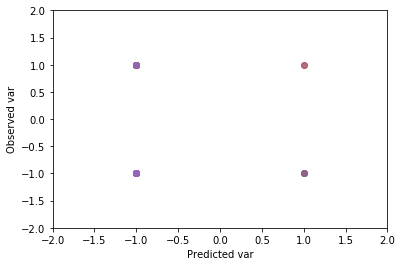

In [ ]:
# Plot cross-validated predicted outcomes vs actual : For Regression
from sklearn.model_selection import StratifiedKFold, KFold
# cv = StratifiedKFold(n_splits=5) 

for train, test in cv.split(X_train, y_train):     # gives index of split
    m.fit(X_train.iloc[train], y_train.iloc[train])
    plt.scatter(m.predict(X_train.iloc[test]), y_train.iloc[test], alpha=0.5 )

plt.xlim(y_train.min()-1,y_train.max()+1)
plt.ylim(y_train.min()-1,y_train.max()+1)
plt.xlabel('Predicted var')
plt.ylabel('Observed var')
plt.show()

In [ ]:
#  ROC with CV
from sklearn.metrics import roc_curve, auc

cv = StratifiedKFold(n_splits=10) 
# cv = LeaveOneGroupOut()

fig_roc = plt.figure(figsize=(8, 8))

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_train, y_train):     # gives index of split
    probas_ = m.fit(X_train.iloc[train], y_train.iloc[train]).predict_proba(X_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3)
    # plt.plot(fpr, tpr, lw=1, alpha=0.3,
    #       label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate\n(1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate\n(Sensitivity)', fontsize=14)
plt.title('Receiver operating characteristic(ROC) Curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# fig_roc.savefig(os.path.join(results,'roc_svm_bal.png'))

print('Average Sensitivity(TPR) :', mean_tpr.mean(), '\nAverage Specificity(FPR):', 1-mean_fpr.mean())

### 4) Cross-validation with permutation testing

In [ ]:
from sklearn.model_selection import permutation_test_score, StratifiedKFold, LeaveOneGroupOut

# type of CV strategy 
# cv = StratifiedKFold(n_splits=5) 
cv=LeaveOneGroupOut()

null_cv_scores = permutation_test_score(m, X_train, y_train, cv=cv, scoring="accuracy", groups=df_fmri_masked.groups, n_permutations=5000, n_jobs=-1) 
score, permutation_scores, pvalue = null_cv_scores
print(score, max(permutation_scores), pvalue)
# score : true perf score without permutation (same as cross_validate)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

KeyboardInterrupt: ignored

In [ ]:
n_classes = np.unique(data_y).size
print("Chance : ", [1. / n_classes])
# View histogram of permutation scores
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
# BUG: vlines(..., linestyle='--') fails on older versions of matplotlib
# plt.vlines(score, ylim[0], ylim[1], linestyle='--',
#          color='g', linewidth=3, label='Classification Score'
#          ' (pvalue %s)' % pvalue)
# plt.vlines(1.0 / n_classes, ylim[0], ylim[1], linestyle='--',
#          color='k', linewidth=3, label='Luck')
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %0.3s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Luck')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

Chance :  [0.5]


NameError: ignored

In [ ]:
n_classes = np.unique(data_y).size
print("Chance : ", [1. / n_classes])

# View histogram of permutation scores

with sns.axes_style('white'), sns.diverging_palette(220, 10) as palette:
 # fig = sns.violinplot(coef, orient='v', color=palette[0])
  fig = sns.distplot(permutation_scores, color=palette[0], bins=20, kde=False)
  plt.axvline(0.5, 0, 1, linestyle='--', color='k',label='Chance level')
  plt.axvline(2 * [score], 0, 1, linestyle='--', color='g', label='Permut score')
  plt.legend()

  #plt.savefig(f'{results}/permutation_LinearSVC')

Chance :  [0.5]


NameError: ignored

### 5) Nested Cross-Validation
*  cross-validation is used simultaneously for selection of the best set of hyperparameters and for error estimation (and assessment of generalization capacity)
* nest two k-fold CV loops :
  (1) inner loop for hyperparameter tuning : GridSearch exhaustively considers all parameter combinations, RandomizedSearch can sample a given number of candidates from a parameter space with a specified distribution
  (2) outer loop for estimating accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


[LibSVM]Average nested_score of 0.8068
Average difference of -0.204539 with std. dev. of 0.000000.


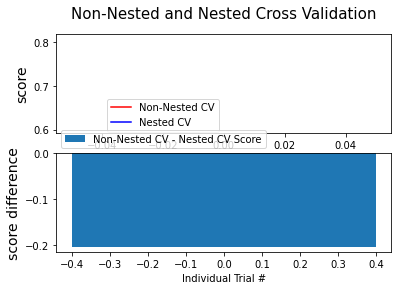

In [ ]:
# In gridsearchCV
# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate

# Number of random trials : try nest-CV several times
NUM_TRIALS = 1

# Set up possible values of parameters to optimize over
# class_weights
# weights = [{-1: x, 1: 1.0-x} for x in np.linspace(0.05, 0.95, 20)]
# balanced = {-1 : n_sbj / (2 *67), 1: n_sbj / (2 *21)}
# weights = np.append(weights, balanced)
# weights = [balanced]

# SVC : C, class_weights
p_grid = {"svc__C" : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}  # "svc__class_weight" : weights}

# svc with smote
# p_grid = {"svc__C" : [0.1, 1, 10, 100]} #"smotetomek__sampling_strategy" : [np.linspace(0.005, 0.05, 10)]}

# LinearSVC
#p_grid = {"linearsvc__C" : [0.01, 0.1, 1, 10, 100, 1000], "linearsvc__loss" : ['hinge', 'squared_hinge']}
# p_grid = {"linearsvc__C" : [0.01, 0.1, 1, 10, 100, 1000], "linearsvc__class_weight" : weights}
# p_grid = {"linearsvc__penalty" : ['l1'], "linearsvc__C" : [0.01, 0.1, 1, 10, 100, 1000], "linearsvc__class_weight" : weights}


# Logistic regression : C, penalty
# p_grid = {"logisticregression__C" : [0.1, 1, 10, 100], "logisticregression__penalty" : ["l2"], 
#          "logisticregression__solver" : ["liblinear", "lbfgs", "newton-cg", "sag", "saga"]}
# p_grid = {"logisticregression__C" : [0.1, 1, 10, 100], "logisticregression__penalty" : ["l1"], 
#           "logisticregression__solver" : ["liblinear", "saga"]}
# p_grid = {"logisticregression__C" : [0.1, 1, 10, 100], "logisticregression__penalty" : ["elasticnet"], 
#           "logisticregression__l1_ratio" : [0.15, 0.5, 0.75], "logisticregression__solver" : ["saga"]}

# Ridge classification
# p_grid = {"ridgeclassifier__alpha" : [1e-3, 1e-2, 1e-1, 1], "ridgeclassifier__class_weight" : weights}

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)
best_param_set = np.array([])

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True)     # to set the regularization hyperparameter
    #outer_cv = StratifiedKFold(n_splits=5, shuffle=True)     # to measure prediction performance
    outer_cv = LeaveOneGroupOut()     # to measure prediction performance


    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=m, param_grid=p_grid, cv=inner_cv,
                       iid=False, n_jobs=-1)
    clf.fit(X_train, y_train)
    non_nested_scores[i] = clf.best_score_
    np.append(best_param_set, clf.best_params_)

    # Nested CV with parameter optimization
    nested_score = cross_validate(clf, X=X_train, y=y_train, cv=outer_cv, scoring=scoring, groups=df_fmri_masked.groups)
    # nested_scores[i] = nested_score['test_Balanced_acc'].mean()
    nested_scores[i] = nested_score['test_AUC'].mean()

score_difference = non_nested_scores - nested_scores

print("Average nested_score of %0.4f" %nested_scores.mean())
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

In [ ]:
print(clf.best_params_)
print("Nested accuracy score of {:6f} with std. dev. of {:6f}."
      .format(nested_score['test_Accuracy'].mean(), nested_score['test_Accuracy'].std()))
#print("Nested balanced accuracy score of {:6f} with std. dev. of {:6f}."
#      .format(nested_score['test_Balanced_acc'].mean(), nested_score['test_Balanced_acc'].std()))
print("Nested AUC score of {:6f} with std. dev. of {:6f}."
      .format(nested_score['test_AUC'].mean(), nested_score['test_AUC'].std()))

{'svc__C': 1e-05}
Nested accuracy score of 0.619318 with std. dev. of 0.238298.
Nested AUC score of 0.806818 with std. dev. of 0.394794.


In [ ]:
# compute the regularization path of the estimator
cvm= linear_model.LogisticRegressionCV(cv=cv, penalty='l2', scoring=scoring, class_weight='balanced', n_jobs=-1)

cvm.score(X_train, y_train)

# best params
print("best parameters set : ")
best_parameters = cvm.get_params())
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

# print("Accuracy : %0.3f (+/- %0.3f)" % (cvm.['test_Accuracy'].mean(), cvm['test_Accuracy'].std() * 2))
# # accuracy balanced for class size
# print("Balanced Accuracy : %0.3f (+/- %0.3f)" % (cvm['test_Balanced_acc'].mean(), cv_score['test_Balanced_acc'].std() * 2))
# # AUC
# print("AUC : %0.3f (+/- %0.3f)" % (cv_score['test_AUC'].mean(), cv_score['test_AUC'].std() * 2))

### 6) Dummy classifier CV

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold, LeaveOneGroupOut

# type of CV strategy 
# cv = StratifiedKFold(n_splits=5)   # each set contains approximately the same percentage of samples of each target class as the complete set.
cv = LeaveOneGroupOut()
# %prun 
cv_score_dum=cross_validate(dum, X_train, y_train, scoring=scoring, cv=cv, groups=df_fmri_masked.groups, n_jobs=-1, return_estimator =True, verbose=1);


[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    2.3s finished


In [ ]:
# check performance
print("Chance level performance")
# total prediction accuracy
print("Accuracy : %0.3f (+/- %0.3f)" % (cv_score_dum['test_Accuracy'].mean(), cv_score_dum['test_Accuracy'].std() * 2))
# accuracy balanced for class size
print("Balanced Accuracy : %0.3f (+/- %0.3f)" % (cv_score_dum['test_Balanced_acc'].mean(), cv_score_dum['test_Balanced_acc'].std() * 2))
# AUC
print("AUC : %0.3f (+/- %0.3f)" % (cv_score_dum['test_AUC'].mean(), cv_score_dum['test_AUC'].std() * 2))


Chance level performance
Accuracy : 0.545 (+/- 0.668)
Balanced Accuracy : 0.545 (+/- 0.668)
AUC : 0.568 (+/- 0.757)


### 7) Binomial cumulative distribution for Stat Significance

In [ ]:
# quantile corresponding to the lower tail probability

from scipy.stats import binom
q = binom.ppf([1-0.001, 1-0.01, 1-0.05], n=n_sbj, p=0.5)*100/n_sbj

q

array([65.90909091, 62.5       , 59.09090909])

### 8) Recursive Feature Elimination with CV
* Given a external estimator that assigns weights to features, RFE is to select features by recursively considering smaller and smaller sets of features.
1. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or feature_importances_ attribute. 
2. Then, the least important features are pruned from current set of features.
3. The procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
* RFECV : performs RFE in a cross-validation loop to find the optimal number of features.
* takes a long time to compute

In [ ]:
# RFE for estimator without pipeline
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

#cv = StratifiedKFold(n_splits=5) 
cv = LeaveOneGroupOut()
scoring ='roc_auc'

rfecv = RFECV(m, step=1, cv=cv, scoring=scoring)

rfecv.fit(X_train, y_train, groups=df_fmri_masked.groups)

print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
# RFE for pipeline

# pipeline : feature scaling - model
# use when splitting train & test set, CV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing

class PipelineRFE(Pipeline) :

  def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        #self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

m = PipelineRFE(steps = m.steps)

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

#cv = StratifiedKFold(n_splits=5) 
cv = LeaveOneGroupOut()
scoring ='roc_auc'

rfecv = RFECV(m, step=1, cv=cv, scoring=scoring, verbose=1, n_jobs=-1)     # increase step to run faster

rfecv.fit(X_train, y_train, groups=df_fmri_masked.groups)

print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (roc_auc)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

rfe_rank = rfecv.ranking_
rfe_rank.to_feather(f'{data_path}/dataframes/rfe_rank')
rfecv.to_feather(f'{data_path}/dataframes/rfe')

### Test the number of epochs

In [ ]:
epochs = [1, 10, 100, 200, 500, 1000, 2000, 5000, 10000]
perf=[]

for i in epochs :

  print('\nTraining model with iterations: ', i)
  # m = LinearSVC(C=1.0, penalty='l1', max_iter=i, verbose=1)    # default
  m = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')    # L2(Default)
  m = make_pipeline(preprocessing.StandardScaler(), m)
  cv_score=cross_validate(m, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_estimator =True, return_train_score=True, verbose=1);

  # check performance
  print("\nTraining performance")
  # total prediction accuracy
  print("Accuracy : %0.3f (+/- %0.3f)" % (cv_score['train_Accuracy'].mean(), cv_score['train_Accuracy'].std() * 2),
        " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['train_Accuracy']).tconfint_mean(alpha=0.05))
  # accuracy balanced for class size
  print("Balanced Accuracy : %0.3f (+/- %0.3f)" % (cv_score['train_Balanced_acc'].mean(), cv_score['train_Balanced_acc'].std() * 2),
        " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['train_Balanced_acc']).tconfint_mean(alpha=0.05))
  # AUC
  print("AUC : %0.3f (+/- %0.3f)" % (cv_score['train_AUC'].mean(), cv_score['train_AUC'].std() * 2),
        " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['train_AUC']).tconfint_mean(alpha=0.05))

  print("\nTest performance")
  # total prediction accuracy
  print("Accuracy : %0.3f (+/- %0.3f)" % (cv_score['test_Accuracy'].mean(), cv_score['test_Accuracy'].std() * 2),
        " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['test_Accuracy']).tconfint_mean(alpha=0.05))
  # accuracy balanced for class size
  print("Balanced Accuracy : %0.3f (+/- %0.3f)" % (cv_score['test_Balanced_acc'].mean(), cv_score['test_Balanced_acc'].std() * 2),
        " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['test_Balanced_acc']).tconfint_mean(alpha=0.05))
  # AUC
  print("AUC : %0.3f (+/- %0.3f)" % (cv_score['test_AUC'].mean(), cv_score['test_AUC'].std() * 2),
        " CI : [%0.3f, %0.3f]" % sms.DescrStatsW(cv_score['test_AUC']).tconfint_mean(alpha=0.05))

  perf.append(cv_score['test_AUC'].mean()*100)

# Convert the performance score list to a series
perf = pd.Series(perf, index = epochs)

perf


Training model with iterations:  1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



Training performance
Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
Balanced Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
AUC : 1.000 (+/- 0.000)  CI : [1.000, 1.000]

Test performance
Accuracy : 0.512 (+/- 0.157)  CI : [0.403, 0.622]
Balanced Accuracy : 0.400 (+/- 0.094)  CI : [0.335, 0.465]
AUC : 0.452 (+/- 0.161)  CI : [0.340, 0.564]

Training model with iterations:  10


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



Training performance
Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
Balanced Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
AUC : 1.000 (+/- 0.000)  CI : [1.000, 1.000]

Test performance
Accuracy : 0.512 (+/- 0.157)  CI : [0.403, 0.622]
Balanced Accuracy : 0.400 (+/- 0.094)  CI : [0.335, 0.465]
AUC : 0.453 (+/- 0.172)  CI : [0.333, 0.572]

Training model with iterations:  100


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



Training performance
Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
Balanced Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
AUC : 1.000 (+/- 0.000)  CI : [1.000, 1.000]

Test performance
Accuracy : 0.524 (+/- 0.199)  CI : [0.386, 0.662]
Balanced Accuracy : 0.420 (+/- 0.157)  CI : [0.311, 0.529]
AUC : 0.458 (+/- 0.167)  CI : [0.343, 0.574]

Training model with iterations:  200


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



Training performance
Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
Balanced Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
AUC : 1.000 (+/- 0.000)  CI : [1.000, 1.000]

Test performance
Accuracy : 0.512 (+/- 0.157)  CI : [0.403, 0.622]
Balanced Accuracy : 0.400 (+/- 0.094)  CI : [0.335, 0.465]
AUC : 0.453 (+/- 0.172)  CI : [0.333, 0.572]

Training model with iterations:  500


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



Training performance
Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
Balanced Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
AUC : 1.000 (+/- 0.000)  CI : [1.000, 1.000]

Test performance
Accuracy : 0.524 (+/- 0.199)  CI : [0.386, 0.662]
Balanced Accuracy : 0.420 (+/- 0.157)  CI : [0.311, 0.529]
AUC : 0.455 (+/- 0.164)  CI : [0.342, 0.569]

Training model with iterations:  1000


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



Training performance
Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
Balanced Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
AUC : 1.000 (+/- 0.000)  CI : [1.000, 1.000]

Test performance
Accuracy : 0.512 (+/- 0.157)  CI : [0.403, 0.622]
Balanced Accuracy : 0.400 (+/- 0.094)  CI : [0.335, 0.465]
AUC : 0.458 (+/- 0.155)  CI : [0.350, 0.566]

Training model with iterations:  2000


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



Training performance
Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
Balanced Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
AUC : 1.000 (+/- 0.000)  CI : [1.000, 1.000]

Test performance
Accuracy : 0.501 (+/- 0.181)  CI : [0.376, 0.627]
Balanced Accuracy : 0.391 (+/- 0.120)  CI : [0.308, 0.475]
AUC : 0.455 (+/- 0.164)  CI : [0.342, 0.569]

Training model with iterations:  5000


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



Training performance
Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
Balanced Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
AUC : 1.000 (+/- 0.000)  CI : [1.000, 1.000]

Test performance
Accuracy : 0.524 (+/- 0.199)  CI : [0.386, 0.662]
Balanced Accuracy : 0.420 (+/- 0.157)  CI : [0.311, 0.529]
AUC : 0.453 (+/- 0.172)  CI : [0.333, 0.572]

Training model with iterations:  10000

Training performance
Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
Balanced Accuracy : 1.000 (+/- 0.000)  CI : [1.000, 1.000]
AUC : 1.000 (+/- 0.000)  CI : [1.000, 1.000]

Test performance
Accuracy : 0.512 (+/- 0.157)  CI : [0.403, 0.622]
Balanced Accuracy : 0.400 (+/- 0.094)  CI : [0.335, 0.465]
AUC : 0.455 (+/- 0.164)  CI : [0.342, 0.569]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


1        45.230769
10       45.260684
100      45.846154
200      45.260684
500      45.538462
1000     45.816239
2000     45.538462
5000     45.260684
10000    45.538462
dtype: float64

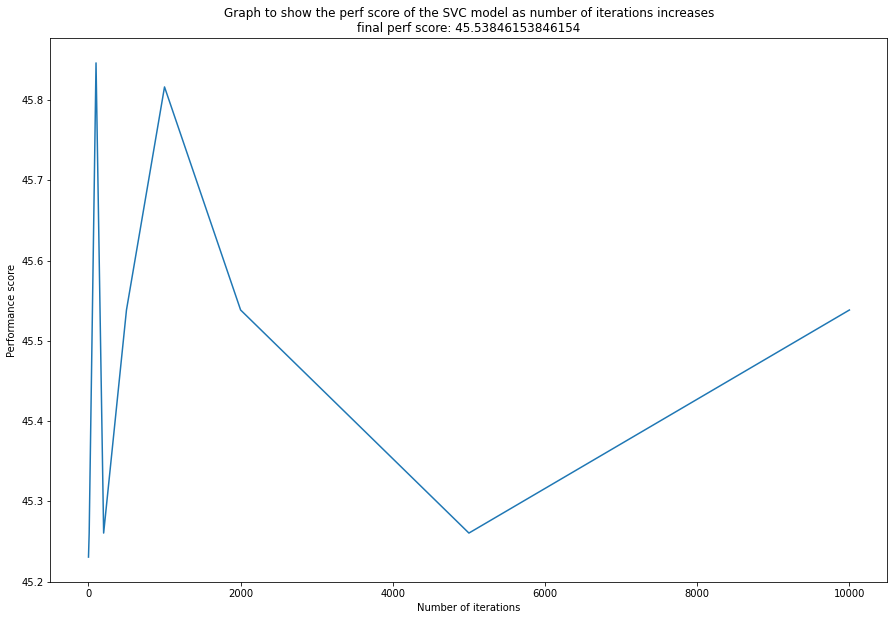

In [ ]:
# Set the plot size
plt.figure(figsize = (15,10))
# Set the plot title
title = 'Graph to show the perf score of the SVC model as number of iterations increases\nfinal perf score: ' + str(perf.iloc[-1])
plt.title(title)
# Set the xlabel and ylabel
plt.xlabel('Number of iterations')
plt.ylabel('Performance score')
# Plot the graph
perf.plot.line()
plt.show()

### For Random Forest

In [ ]:
m.fit(X_train, y_train)
print_score(m)

accuracy (chance level : 0.03 ),rmse, oob_score :  [0.7113592285116941, -0.048263956822398375, 4.913879758980097, 9.793514010132762]


In [ ]:
# check selected features
features_bool = np.array(rfecv.support_)
features = np.array(X_train.columns)
result = features[features_bool]
print(len(result))
print(result)

 # check ranking of features
features_rank = rfecv.ranking_
print(features_rank)
rank = features_rank[features_bool]
print(rank)

# reduce X to the selected features
X_rfe = rfecv.transform(X_train)
print(X_rfe.shape)

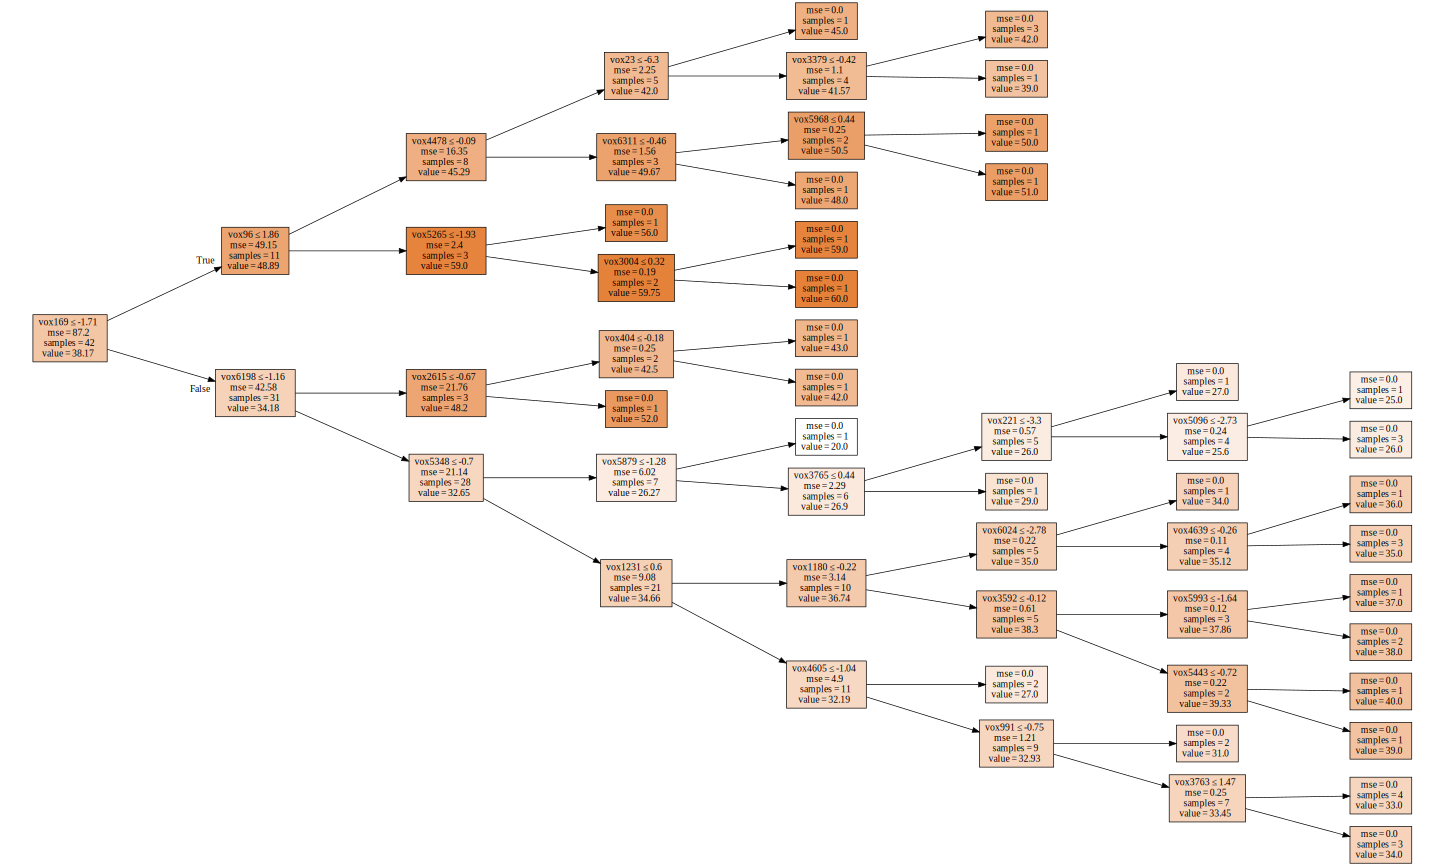

In [ ]:
# visualize trees
draw_tree(m.estimators_[0], df_fmri_masked, precision=2, size=20)

37.15277777777778 8.790556363100091


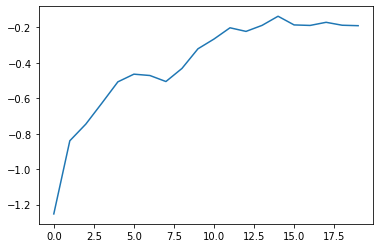

In [ ]:
# check how adding more trees help improve performance

preds = np.stack([t.predict(X_test) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_test[0]

print(np.mean(preds[:]), np.std(preds[:]))       
# std tells us how confident we are of the prediction

plt.plot([metrics.r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

### Bagging
* bootstrap aggregation : with replacement
* random sampling 
* get confidence intervals of performance scores

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=m, oob_score = True, n_jobs=-1)

bag.fit(X_train, y_train)
# print('OOB score : ', bag.oob_score)

In [ ]:
bag.score(X_train, y_train)

1.0

## Results of other dependent variables

### Ex-In contrast map prediction of BFNE-bin

NameError: ignored

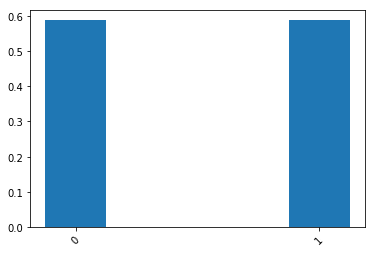

In [ ]:
# result summary
plt.figure()

category=[0,1]
tick_position = np.arange(len(data_y.unique()))
plt.xticks(tick_position, category, rotation=45)

score_means = [np.mean(cv_score['test_AUC'])]
plt.bar(tick_position, score_means, label='cb_combined2_bin mask',
        width=.25)

score_chance = [np.mean(np.mean(null_cv_scores))]
plt.bar(tick_position, score_chance, label='permuted',
        width=.25, edgecolor='k', facecolor='none')

tick_position = tick_position + .2

plt.ylabel('Classification accuracy (AUC score)')
plt.xlabel('BFNE binary scores')
plt.ylim(0.3, 1)
plt.legend(loc='upper right')
plt.title('Category-specific classification accuracy of Exc-Inc contrast map')
plt.tight_layout()

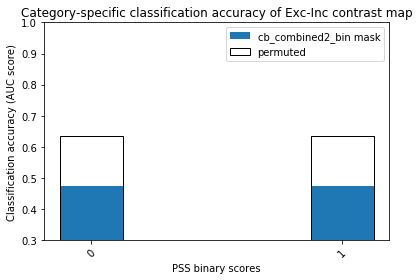

In [ ]:
# result summary
plt.figure()

category=[0,1]
tick_position = np.arange(len(data_y.unique()))
plt.xticks(tick_position, category, rotation=45)

score_means = [cv_score.mean()]
plt.bar(tick_position, score_means, label='cb_combined2_bin mask',
        width=.25)

score_chance = [np.mean(np.mean(null_cv_scores))]
plt.bar(tick_position, score_chance, label='permuted',
        width=.25, edgecolor='k', facecolor='none')

tick_position = tick_position + .2

plt.ylabel('Classification accuracy (AUC score)')
plt.xlabel('PSS binary scores')
plt.ylim(0.3, 1)
plt.legend(loc='upper right')
plt.title('Category-specific classification accuracy of Exc-Inc contrast map')
plt.tight_layout()

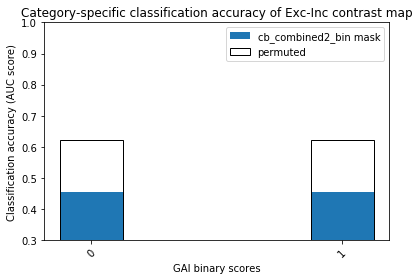

In [ ]:
# result summary
plt.figure()

category=[0,1]
tick_position = np.arange(len(data_y.unique()))
plt.xticks(tick_position, category, rotation=45)

score_means = [cv_score.mean()]
plt.bar(tick_position, score_means, label='cb_combined2_bin mask',
        width=.25)

score_chance = [np.mean(np.mean(null_cv_scores))]
plt.bar(tick_position, score_chance, label='permuted',
        width=.25, edgecolor='k', facecolor='none')

tick_position = tick_position + .2

plt.ylabel('Classification accuracy (AUC score)')
plt.xlabel('GAI binary scores')
plt.ylim(0.3, 1)
plt.legend(loc='upper right')
plt.title('Category-specific classification accuracy of Exc-Inc contrast map')
plt.tight_layout()

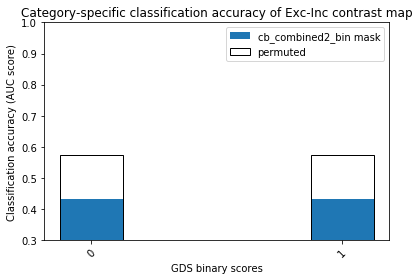

In [ ]:
# result summary
plt.figure()

category=[0,1]
tick_position = np.arange(len(data_y.unique()))
plt.xticks(tick_position, category, rotation=45)

score_means = [cv_score.mean()]
plt.bar(tick_position, score_means, label='cb_combined2_bin mask',
        width=.25)

score_chance = [np.mean(np.mean(null_cv_scores))]
plt.bar(tick_position, score_chance, label='permuted',
        width=.25, edgecolor='k', facecolor='none')

tick_position = tick_position + .2

plt.ylabel('Classification accuracy (AUC score)')
plt.xlabel('GDS binary scores')
plt.ylim(0.3, 1)
plt.legend(loc='upper right')
plt.title('Category-specific classification accuracy of Exc-Inc contrast map')
plt.tight_layout()

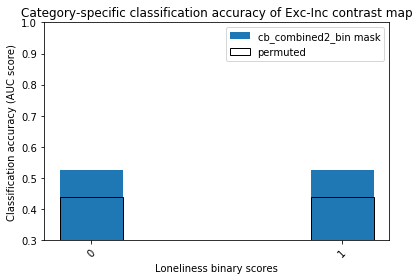

In [ ]:
# result summary
plt.figure()

category=[0,1]
tick_position = np.arange(len(data_y.unique()))
plt.xticks(tick_position, category, rotation=45)

score_means = [cv_score.mean()]
plt.bar(tick_position, score_means, label='cb_combined2_bin mask',
        width=.25)

score_chance = [np.mean(np.mean(null_cv_scores))]
plt.bar(tick_position, score_chance, label='permuted',
        width=.25, edgecolor='k', facecolor='none')

tick_position = tick_position + .2

plt.ylabel('Classification accuracy (AUC score)')
plt.xlabel('Loneliness binary scores')
plt.ylim(0.3, 1)
plt.legend(loc='upper right')
plt.title('Category-specific classification accuracy of Exc-Inc contrast map')
plt.tight_layout()

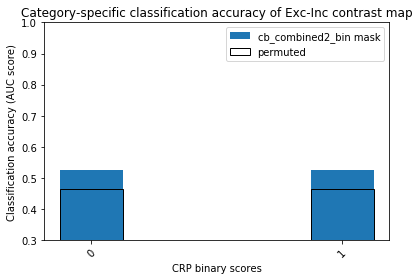

In [ ]:
# result summary
plt.figure()

category=[0,1]
tick_position = np.arange(len(data_y.unique()))
plt.xticks(tick_position, category, rotation=45)

score_means = [cv_score.mean()]
plt.bar(tick_position, score_means, label='cb_combined2_bin mask',
        width=.25)

score_chance = [np.mean(np.mean(null_cv_scores))]
plt.bar(tick_position, score_chance, label='permuted',
        width=.25, edgecolor='k', facecolor='none')

tick_position = tick_position + .2

plt.ylabel('Classification accuracy (AUC score)')
plt.xlabel('CRP binary scores')
plt.ylim(0.3, 1)
plt.legend(loc='upper right')
plt.title('Category-specific classification accuracy of Exc-Inc contrast map')
plt.tight_layout()

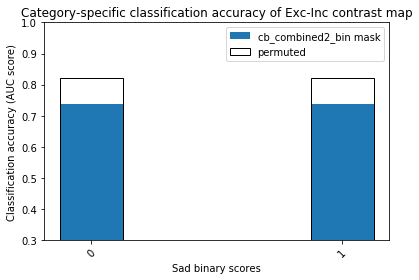

In [ ]:
# result summary
plt.figure()

category=[0,1]
tick_position = np.arange(len(data_y.unique()))
plt.xticks(tick_position, category, rotation=45)

score_means = [cv_score.mean()]
plt.bar(tick_position, score_means, label='cb_combined2_bin mask',
        width=.25)

score_chance = [np.mean(np.mean(null_cv_scores))]
plt.bar(tick_position, score_chance, label='permuted',
        width=.25, edgecolor='k', facecolor='none')

tick_position = tick_position + .2

plt.ylabel('Classification accuracy (AUC score)')
plt.xlabel('Sad binary scores')
plt.ylim(0.3, 1)
plt.legend(loc='upper right')
plt.title('Category-specific classification accuracy of Exc-Inc contrast map')
plt.tight_layout()

### Rein-Inc contrast map prediction

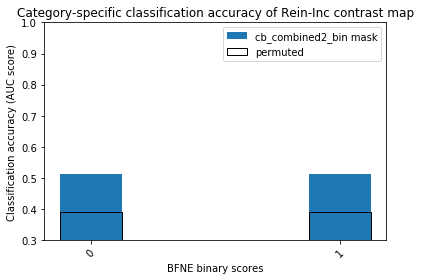

In [ ]:
# result summary
plt.figure()

category=[0,1]
tick_position = np.arange(len(data_y.unique()))
plt.xticks(tick_position, category, rotation=45)

score_means = [cv_score.mean()]
plt.bar(tick_position, score_means, label='cb_combined2_bin mask',
        width=.25)

score_chance = [np.mean(np.mean(null_cv_scores))]
plt.bar(tick_position, score_chance, label='permuted',
        width=.25, edgecolor='k', facecolor='none')

tick_position = tick_position + .2

plt.ylabel('Classification accuracy (AUC score)')
plt.xlabel('BFNE binary scores')
plt.ylim(0.3, 1)
plt.legend(loc='upper right')
plt.title('Category-specific classification accuracy of Rein-Inc contrast map')
plt.tight_layout()

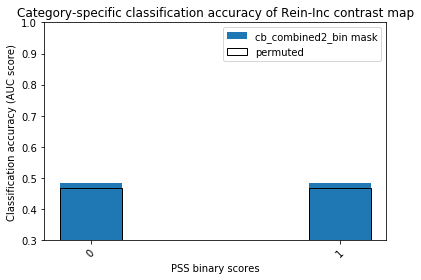

In [ ]:
# result summary
plt.figure()

category=[0,1]
tick_position = np.arange(len(data_y.unique()))
plt.xticks(tick_position, category, rotation=45)

score_means = [cv_score.mean()]
plt.bar(tick_position, score_means, label='cb_combined2_bin mask',
        width=.25)

score_chance = [np.mean(np.mean(null_cv_scores))]
plt.bar(tick_position, score_chance, label='permuted',
        width=.25, edgecolor='k', facecolor='none')

tick_position = tick_position + .2

plt.ylabel('Classification accuracy (AUC score)')
plt.xlabel('PSS binary scores')
plt.ylim(0.3, 1)
plt.legend(loc='upper right')
plt.title('Category-specific classification accuracy of Rein-Inc contrast map')
plt.tight_layout()

# Interpretability
1) Intrinsic interpretability : models are interpretable due to simple structure
> linear regression, logistic regression, decision tree

![](https://drive.google.com/uc?export=view&id=13UTNPaMd0IT66TyeJTbrDGgQsh7r9Wud)

2) Post hoc interpretability : apply to models after training
* **Permutation feature importance** measures the increase in the prediction error of the model after we permuted the feature’s values, which breaks the relationship between the feature and the true outcome. A feature is “important” if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction. A feature is “unimportant” if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction. The importance measure automatically takes into account all interactions with other features. 

> The permutation feature importance algorithm based on Fisher, Rudin, and Dominici (2018):

> Input: Trained model f, feature matrix X, target vector y, error measure L(y,f).
> 1. Estimate the original model error Eorig = L(y, f(X)) (e.g. mean squared error, 1-AUC)
> 2. For each feature j = 1,…,p do:
>* Generate feature matrix Xperm by permuting feature j in the data X. This breaks the association between feature j and true outcome y.
>* Estimate error Eperm = L(Y,f(Xperm)) based on the predictions of the permuted data.
>* Calculate permutation feature importance FIj= Eperm/Eorig. Alternatively, the difference can be used: FIj = Eperm - Eorig
> 3. Sort features by descending FI.

* When the permutation is repeated, the results might vary greatly. Repeating the permutation and averaging the importance measures over repetitions stabilizes the measure
* If features are correlated, the permutation feature importance can be biased by unrealistic data instances.

Results of interpretation
* feature summary statistic : feature importance, pairwise feature interaction strengths 
* feature summary visualization : partial dependence plots
* model internals : learned weights(only for intrinsic), visualization of feature detectors in CNN
* data point : return data points to make a model interpretable(data points themselves have to be interpretable; better for images, texts), counterfactual explanations(find a similar datapoint by changing some features for which the predicted outcome changes), identify prototypes of predicted classes
* intrinsically interpretable model : approximate black box models to an interpretable model

Levels of Interpretability
* Global : which features are important and what kind of interactions between them take place? holistic & modular
* Local for a single prediction : why did the model make a certain prediction for an instance? (locally, the predictio might depend differently on some features), can check with simulations
* Global or Local for a group of predictions

Properties of Explanations
* fidelity : how well does the explanation approximate the prediction of the black box model?
* consistency : how much does an explanation differ between models that have been trained on the same task and produce similar predictions? If two models use different features but get similar predictions(Rashomon Effect), high consistency of explanations is not desirable. If the models really rely on similar relationships, high consistency is desirable.
* stability : how similar are the explanations for similar instances? high stability is always desirable(it should not be a result of high variance of the explanation method)




For this analysis...
* After you've tuned your hyperparameters & checked performance scores
* Using the best hyperparameters, train a fresh model on all the data so you can extract as much information as possible.
> using CV, we have a different set of voxels and thus a different classifier in each fold.
> A heuristic approach is to group all the voxels that were selected in at least one of the holds and run CV again on that set. If the accuracy is comparable to what was obtained with the original CV, the weights can be averaged across folds and considered.
> Or, if the accuracy using all the voxels available is high, we can just consider the weights over all those voxels
> (Pereira et al., 2009) 
* According Jeremy Howard, using all the data to get the best parameters is pointless in interpreting the features. If you are trying to find out which feature is important and how they are related to each other, having that 4th decimal place of accuracy is not going to change any of your insights at all.

* Standardize features

In [ ]:
# train on all data
X_train=df_fmri_masked.drop(['target', 'groups'], axis=1)
y_train=df_fmri_masked.target


In [ ]:
# fit the model
# %time 
m.fit(X_train, y_train)
# m.fit(X_rfe, y_train)

[LibSVM]

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=True))],
         verbose=False)

In [ ]:
m.steps[-1][-1].dual_coef_.shape

(1, 154)

### Weight maps

In [ ]:
# Coefficient weights : only classifier
#coef = m.coef_

# if pipeline, check where the model is in 'steps'
coef = m.steps[-1][-1].coef_
coef

#np.savetxt(f'{results}/coef_LinearSVC.csv', coef.transpose(), delimiter=",")

array([[ 4.54687510e-04, -7.06090373e-04,  6.80593871e-04, ...,
         2.44402190e-04, -9.86930638e-05, -2.66848191e-03]])

In [ ]:
# Coefficient weights : only classifier
#coef = m.coef_

# if pipeline, check where the model is in 'steps'
coef = m.steps[-1][-1].coef_
coef.shape

#np.savetxt(f'{results}/coef_LinearSVC.csv', coef.transpose(), delimiter=",")

w
L_lOFC_vox1  -0.003325
L_lOFC_vox2  -0.005157
L_lOFC_vox3   0.004302
L_lOFC_vox4   0.000620
L_lOFC_vox5   0.005093
...                ...
R_nacc_vox80  0.001746
R_nacc_vox81  0.006618
R_nacc_vox82  0.005620
R_nacc_vox83  0.002420
R_nacc_vox84 -0.005940

[6573 rows x 1 columns]

In [ ]:
# labels
c=pd.DataFrame(coef.T, index=X_train.columns, columns=['w']); c
sorted_w = c.sort_values(by='w',ascending=False); sorted_w

sorted_w.to_csv(f'{results}/coefsorted_LinearSVC.csv')

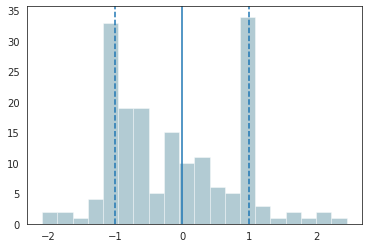

In [ ]:
# decision function : w*x + b
dec_func = m.decision_function(X_train)
#sns.violinplot(x=n[0][88:], hue=n[1], orient='v')

with sns.axes_style('white'), sns.diverging_palette(220, 10) as palette:
 # fig = sns.violinplot(coef, orient='v', color=palette[0])
  fig = sns.distplot(dec_func, color=palette[0], bins=20, kde=False)
  plt.axvline(0, 0, 1)
  plt.axvline(1, 0, 1, linestyle='--')
  plt.axvline(-1, 0, 1, linestyle='--')
  #plt.legend()

#print(dec_func > 0)
#print(m.predict(X_train))
#print(y_train)

#np.savetxt(f'{results}/decisionfunc_LinearSVC.csv', d, delimiter=",")
#plt.savefig(f'{results}/hist_decisionfunc.png')

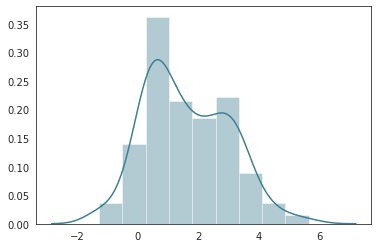

In [ ]:
what = np.dot(coef, X_train.transpose())
with sns.axes_style('white'), sns.diverging_palette(220, 10) as palette:
 # fig = sns.violinplot(coef, orient='v', color=palette[0])
  fig = sns.distplot(what, color=palette[0])  #[:,88:]


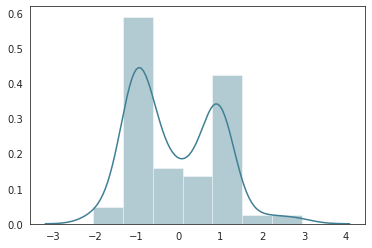

In [ ]:
what = np.dot(coef, scaled.transpose())+bias
with sns.axes_style('white'), sns.diverging_palette(220, 10) as palette:
 # fig = sns.violinplot(coef, orient='v', color=palette[0])
  fig = sns.distplot(what, color=palette[0])  #[:,88:]


In [ ]:
print(what)
print(dec_func)

In [ ]:
# if model has no probability parameter
Y = m.decision_function(X_train)
prob = (Y - Y.min()) / (Y.max() - Y.min()); prob
#print('Prob[0]: %.3f' % (1-prob[0]))
#print('Prob[1]: %.3f' % (prob[0]))

In [ ]:
# probabilities
r = m.predict_proba(X_train); r
#tmp= cv_score['estimator'][2]
print(tmp.steps[-1][-1].probA_)
print(tmp.steps[-1][-1].probB_)
#np.savetxt(f'{results}/prob_LinearSVC.csv', r, delimiter=",")

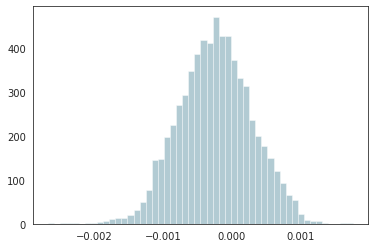

In [ ]:
#coef=pd.read_csv(f'{results}/coef_LinearSVC.csv', header=None); coef

with sns.axes_style('white'), sns.diverging_palette(220, 10) as palette:
 # fig = sns.violinplot(coef, orient='v', color=palette[0])
  fig = sns.distplot(coef, color=palette[0], kde=False)


In [ ]:
# draw weight map
# reverse masking : masker saves shape(coordinates) of the mask
weight_img = masker.inverse_transform(coef)

# Use the mean image as a background to avoid relying on anatomical data
# mean_img = image.mean_img(X_train)

plotting.view_img(weight_img, title='Unthresholded weights', draw_cross=True)

# need to threshold weight maps?? why not only bootstrap?
# thresh_map, thresh = map_threshold(weight_img, alpha=.05, height_control='fdr')
# thresh_map, thresh = map_threshold(weight_img, alpha=.01, height_control='bonferroni')

# Create the figure
plotting.view_img(thresh_map, title='Thresholded weights', draw_cross=True)
print(thresh)

# save the weight maps
#weight_img.to_filename(f'{results}/wmap_LinearSVC.nii')


In [ ]:
from nilearn import datasets, plotting
weight_img = masker.inverse_transform(coef)
fsaverage = datasets.fetch_surf_fsaverage('fsaverage')


Dataset created in /root/nilearn_data/fsaverage



Downloaded 13947990 of 13947990 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/fsaverage/fsaverage.tar.gz..... done.


In [ ]:
#plotting.view_img_on_surf(weight_img,surf_mesh=fsaverage, colorbar=True)

plotting.view_img(weight_img, title='Unthresholded weights', draw_cross=True)

plotting.show()
#display.add_contours(mask_fname, contours=1, antialiased=False, linewidths=3, levels=[0], colors=['white'])

### Permuted feature importance
* increase in the prediction error of the model after we permuted the feature’s values(breaks relationship between the feature and the true outcome)
* classification : loss = 1-AUC
* regression : error = Mean Absolute Error (MAE)

* Since it is inherently related to the error of the model, if the model has bad performance it is useless.

In [ ]:
# import alibi
from sklearn.inspection import permutation_importance

# difference (score of original model) - mean(score of corrupted model, n_repeats)
result = permutation_importance(m.steps[-1][-1], X_train, y_train, 
                                scoring='roc_auc', n_repeats=10, n_jobs=-1)


In [ ]:
# labels
fi=pd.DataFrame(result.importances_mean.T, index=X_train.columns, columns=['fi']); fi
sorted_fi = fi.sort_values(by='fi',ascending=False); sorted_fi

#sorted_fi.to_csv(f'{results}/fisorted_LinearSVC')

fi
vox4412  0.000775
vox5476  0.000646
vox4959  0.000646
vox1002  0.000646
vox825   0.000646
...           ...
vox1447 -0.001162
vox2016 -0.001162
vox2826 -0.001162
vox1443 -0.001291
vox2803 -0.001291

[6573 rows x 1 columns]

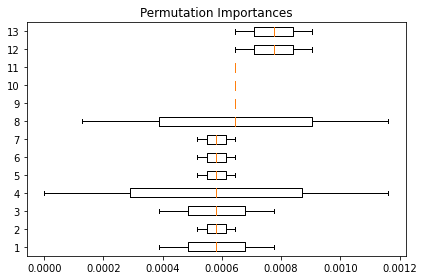

In [ ]:
#sorted_idx = result.importances_mean.argsort()   # average importance of n permutations

#fig, ax = plt.subplots()
#ax.boxplot(result.importances[sorted_idx].T,
#           vert=False, labels=X_train.columns[sorted_idx])
#ax.set_title("Permutation Importances")
#fig.tight_layout()
#plt.show()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T[:,6560:],
           vert=False, labels)
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

In [ ]:
# Feature Importance Map
fi=result.importances_mean

fi_img = masker.inverse_transform(fi)

plotting.view_img(fi_img, title='Feature Importance', draw_cross=True)

# fi_img.to_filename(f'{results}/fimap_LinearSVC.nii')
np.savetxt(f'{results}/fi_LinearSVC.csv', fi, delimiter=",")

In [ ]:
# group features
feat_grp=[]
n=0; idx1=0; idx2=0
for i in range(len(num_vox)) :
  idx2=idx1+num_vox[i]
  feat_grp.append(X_train.columns[idx1:idx2])
  n=n+1; idx1=idx2

print(len(feat_grp))

from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer
from rfpimp import *
np.random.seed(42)
# permutation FI : group features
fi = importances(m,X_train, y_train, features=feat_grp, n_samples=5000, metric=accuracy_score, sort=True)
fi.Importance
# f = plot_importances(fi)
# f.view()


In [ ]:
# permutation FI (no group)
from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer
from rfpimp import *

fi =importances(m,X_train, y_train, n_samples=1000, metric=scoring, sort=True) 
#f = plot_importances(fi)
#f.view()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# permutation FI with cv (no group)
fi = cv_importances(m,X_train, y_train, k=5)
f = plot_importances(fi)
f.view()

In [ ]:
# drop-column FI (no group)
fi = dropcol_importances(m,X_train, y_train, metric=scoring)
#f = plot_importances(fi)
#f.view()

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

### Effect of ROIs
* lesioned effect on performance (Whelan2014)
* Compare performance scores of different models

1.  Wilcoxon signed-rank test : test if two samples differ signitificantly from each other (nonparametric paired t-test)
2. McNemar's Test : check the extent to which the predictions between one model and another match
> homogeneity of the contingency table (marginal probability)
3. 5x2CV paired t-test : Let’s say we have two classifiers, A and B. We randomly split the data in 50% training and 50% test. Then, we train each model on the training data and compute the difference in accuracy between the models from the test set, called DiffA. Then, the training and test splits are reversed and the difference is calculated again in DiffB. This is repeated five times after which the mean variance of the differences is computed (S²)
> strong statistical foundation

In [ ]:
# Wilcoxon signed-rank test
from scipy.stats import wilcoxon

results_model1 =

results_model2 = 

# Calculate p value
stat, p = wilcoxon(results_model1, results_model2, zero_method='zsplit'); 
if p <= 0.05 :
  print("There is significant difference between the two models (%.3f)" %p)

In [ ]:
# McNemar's Test
!pip install mlxtend
from mlxtend.evaluate import mcnemar_table, mcnemar

# The correct target (class) labels
y_target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Class labels predicted by model 1
y_model1 = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
                     0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

# Class labels predicted by model 2
y_model2 = np.array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
                     1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

# Calculate p value
tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)
chi2, p = mcnemar(ary=tb, exact=True)

print('chi-squared:', chi2)
print('p-value:', p)

In [ ]:
# 5x2cv paired t-test
!pip install mlxtend
from mlxtend.evaluate import paired_ttest_5x2cv, combined_ftest_5x2cv

clf1 = ExtraTreeClassifier()
clf2 = DecisionTreeClassifier()

# Calculate p-value
t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf2,
                          X=X_train, y=y_train)

In [ ]:
# barplot of scores
plt.figure()

category=[0,1]
tick_position = np.arange(len(data_y.unique()))
plt.xticks(tick_position, category, rotation=45)

score_means = [np.mean(cv_score['test_AUC'])]
plt.bar(tick_position, score_means, label='cb_combined2_bin mask',
        width=.25)

score_chance = [np.mean(np.mean(null_cv_scores))]
plt.bar(tick_position, score_chance, label='permuted',
        width=.25, edgecolor='k', facecolor='none')

tick_position = tick_position + .2

plt.ylabel('Classification accuracy (AUC score)')
plt.xlabel('BFNE binary scores')
plt.ylim(0.3, 1)
plt.legend(loc='upper right')
plt.title('Category-specific classification accuracy of Exc-Inc contrast map')
plt.tight_layout()

### Pattern response
* strength of expression of pattern 
* pattern weights (coef; shape=[1, n_feat]) * brain activation(shape=[n_feat,n_samples]) 
* => scalar value for each subject(shape=[1, n_samples])

* whole brain vs local pattern response

In [ ]:
coef.shape

(1, 6573)

In [ ]:
bias=m.steps[-1][-1].intercept_; bias

array([-0.09716561])

In [ ]:
X_train.shape

(176, 6573)

In [ ]:
# Total pattern response
pat_resp = np.dot(coef.transpose(), X_train.transpose());
print(pat_resp.shape)
print(pat_resp)


In [ ]:
# Total pattern response : absolute values(?)
coef_abs = abs(coef)
pat_resp_abs = np.dot(coef_abs, df_fmri_masked.transpose());
print(pat_resp_abs.shape)
print(pat_resp_abs)

patexp = np.vstack((pat_resp, pat_resp_abs)).transpose()

np.savetxt(f'{results}/pattexp_LinearSVM.csv', pat_resp, delimiter=",")


In [ ]:
# Pattern response for each condition
# exc [:88], inc [88:]

# to scale X_train
scaler= preprocessing.StandardScaler()
scaled=scaler.fit_transform(X_train)

patexp= np.dot(coef, X_train.transpose());
print(patexp.shape)

df_patexp=pd.DataFrame({"patexp_e": patexp[:,:88].T.reshape(88), "patexp_i" : patexp[:,88:].T.reshape(88)}) 
df_patexp
#df_patexp.to_csv(f'{results}/pattexp_LinearSVM.csv', index=False)


(1, 176)


patexp_e  patexp_i
0   1.386985  2.420129
1   3.201095  0.541557
2   3.533442  2.021225
3   2.463522 -0.483944
4   3.098562  1.700935
..       ...       ...
83  2.376323 -0.079106
84  3.904956  0.473373
85  1.108975  0.306266
86 -0.133431  0.561337
87  0.713869  0.677079

[88 rows x 2 columns]

In [ ]:
# Local pattern response
# use multiple roi masks
print("number of voxels for each mask :", num_vox)
patexp=np.empty(shape=[len(mask_list), 176])
st=0
for i, mask_fname in enumerate(mask_list):
    print(mask_fname)
    roi_coef = coef[0,st:st+int(num_vox[i])]; 
    roi_fmri = df_fmri_masked.transpose().iloc[0:int(num_vox[i]),:]; 
    patexp[i] = np.dot(roi_coef, roi_fmri)+bias;
    st=st+int(num_vox[i]);

lab=np.loadtxt(labname_fname, dtype=np.str)    # labels of masks
patexp=pd.DataFrame(patexp.transpose(), columns=lab); patexp

df_patexp=pd.DataFrame({"patexp_e_amyg": patexp.iloc[0,:88].T.reshape(88), "patexp_i_amyg" : patexp.iloc[0,88:].T.reshape(88),
                        "patexp_e_ment": patexp.iloc[1,:88].T.reshape(88), "patexp_i_ment" : patexp.iloc[1,88:].T.reshape(88),
                        "patexp_e_sp": patexp.iloc[2,:88].T.reshape(88), "patexp_i_sp" : patexp.iloc[2,88:].T.reshape(88)}) 

patexp.to_csv(f'{results}/patexp_networks3_LinearSVC.csv', index=False)

number of voxels for each mask : [1636 4594  343]
/gdrive/My Drive/mvpa_dataset/roi/social network3/amygdala_network.nii
/gdrive/My Drive/mvpa_dataset/roi/social network3/mentalizing_network.nii
/gdrive/My Drive/mvpa_dataset/roi/social network3/socialpain_network.nii


In [ ]:
# total pattern response : TEST set
pat_resp = np.dot(coef, X_test.transpose());
print(pat_resp.shape)
print(pat_resp)

# External validation on Loneliness : need index of test set
with sns.axes_style('white'):
    g = (sns.jointplot(pat_resp, "lonecat3", dat, kind='reg', color='g', space=0.2, )
    .set_axis_labels("Pattern Expression", "Loneliness", fontsize=14))

#### Trait variables correlation with Pattern expression



In [ ]:
data_patexp = pd.read_csv(f'{results}/pattexp_LinearSVC.csv'); 
#data_patexp = pd.read_csv(f'{results}/pattexp_networks3_LinearSVC.csv'); 

In [ ]:
dat=pd.DataFrame.join(beh_dat, data_patexp)
dat.describe(include='all')

scanid          dbid  Demo  ...   patexp_i  patexp_e_nobias  patexp_i_nobias
count       88  8.800000e+01   0.0  ...  88.000000        88.000000        88.000000
unique      88           NaN   NaN  ...        NaN              NaN              NaN
top     034JSO           NaN   NaN  ...        NaN              NaN              NaN
freq         1           NaN   NaN  ...        NaN              NaN              NaN
mean       NaN  4.020118e+07   NaN  ...   1.000053         3.989503         0.938606
std        NaN  1.902742e+07   NaN  ...   0.877363         1.272610         0.877363
min        NaN  1.000101e+07   NaN  ...  -3.006458         1.998266        -3.067905
25%        NaN  3.010201e+07   NaN  ...   0.587323         3.163869         0.525877
50%        NaN  3.020252e+07   NaN  ...   1.095936         3.759253         1.034489
75%        NaN  5.000801e+07   NaN  ...   1.501885         4.492354         1.440439
max        NaN  8.000901e+07   NaN  ...   2.660137         9.863427         2.598691

[11 rows x 181 columns]

##### Scatter plot

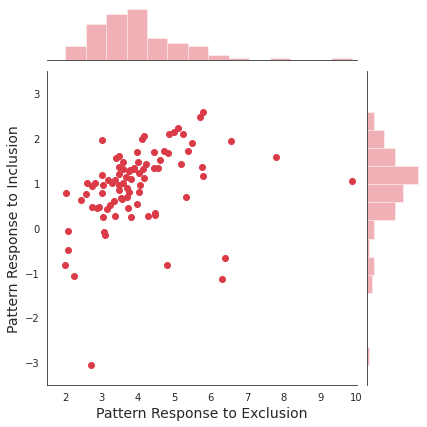

In [ ]:
# Total pattern expression
# scatterplot + histogram
with sns.axes_style('white'), sns.diverging_palette(220, 10) as palette:
    g = (sns.jointplot("patexp_e_nobias", "patexp_i_nobias", dat, color=palette[-1], space=0.2, xlim=(1.5,10), ylim=(-3.5,3.5))
    .set_axis_labels("Pattern Response to Exclusion", "Pattern Response to Inclusion", fontsize=14))

g.savefig(f'{results}/plot_patexpE_I.png')


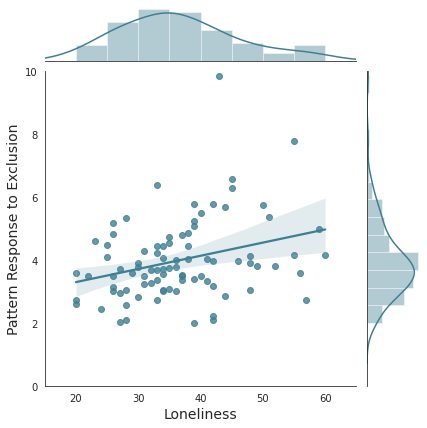

In [ ]:
# Total pattern expression
# regression + scatterplot + histogram
with sns.axes_style('white'), sns.diverging_palette(220, 10) as palette:
    g = (sns.jointplot("loneli", "patexp_e_nobias", dat,kind='reg', color=palette[0], space=0.2, xlim=(15, 65), ylim=(0,10))   #E(0,10) I(-3.5,3.5)
    .set_axis_labels("Loneliness", "Pattern Response to Exclusion", fontsize=14))

g.savefig(f'{results}/plot_patexpE_loneli.png')


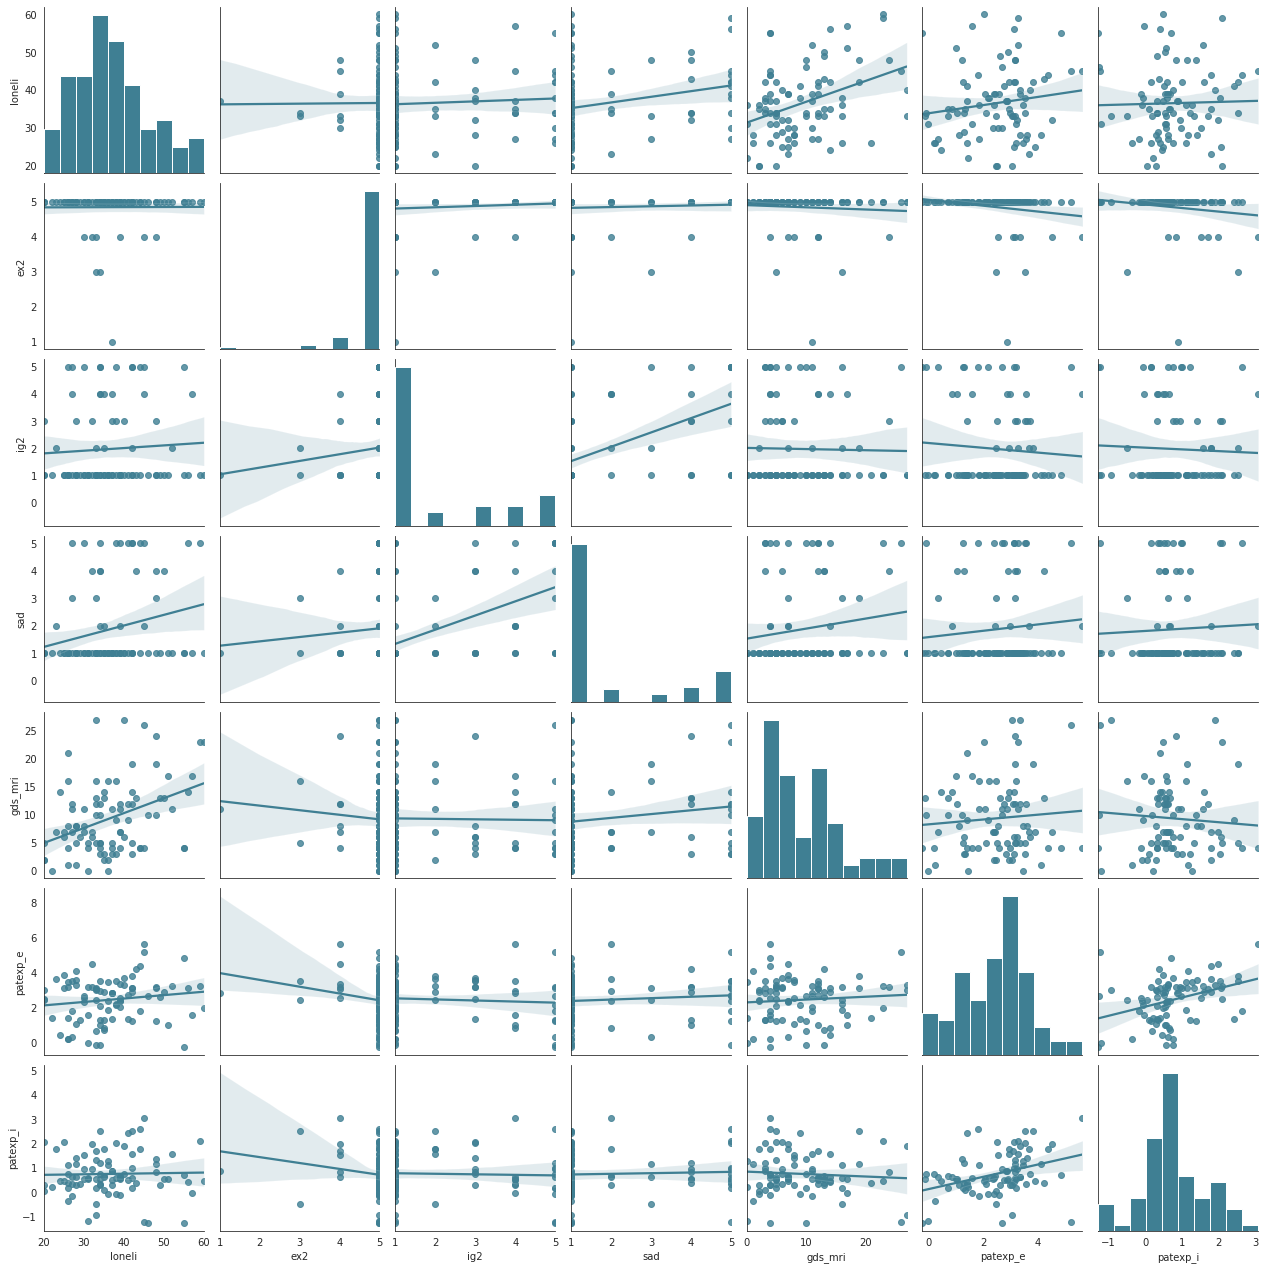

In [ ]:
# Total pattern expression & multiple variables
 
with sns.axes_style('white'), sns.diverging_palette(220, 10) as palette:
    g = (sns.pairplot(dat, vars=["loneli", "ex2", "ig2","sad", "gds_mri", "patexp_e", "patexp_i"], kind="reg"))
    # .set_axis_labels("Pattern Expression", "Loneliness", fontsize=14))

# g.savefig(f'{results}/patexp_networks_loneli_LinearSVC.png')

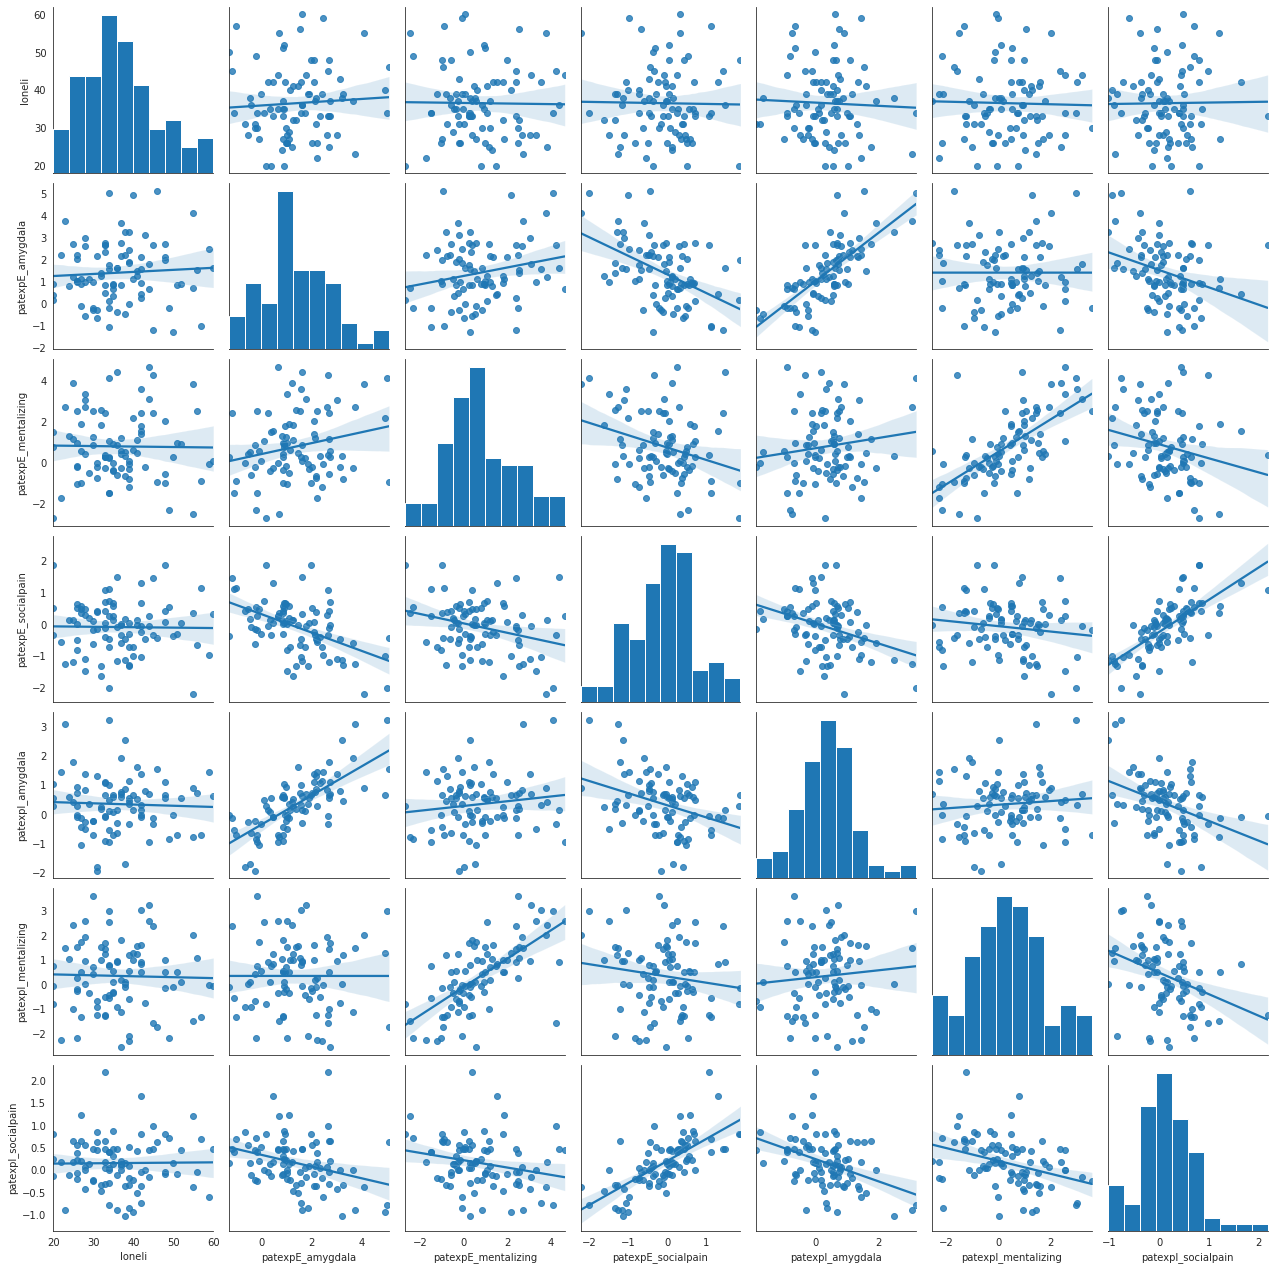

In [ ]:
# Local pattern expression
 
with sns.axes_style('white'):
    g = (sns.pairplot(dat, vars=["loneli", "patexpE_amygdala", "patexpE_mentalizing", "patexpE_socialpain",
                                 "patexpI_amygdala", "patexpI_mentalizing", "patexpI_socialpain" ], kind="reg"))
    # .set_axis_labels("Pattern Expression", "Loneliness", fontsize=14))

# g.savefig(f'{results}/patexp_networks_loneli_LinearSVC.png')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


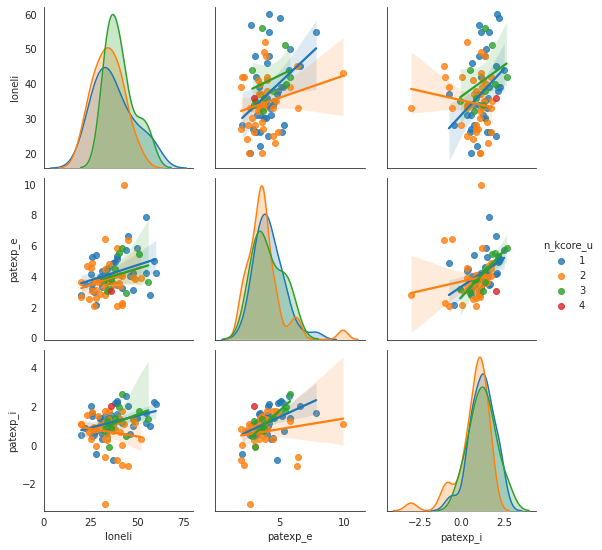

In [ ]:
# Local pattern expression : by other factors
# e.g. loneliness level
 
with sns.axes_style('white'):
    g = (sns.pairplot(dat, vars=["loneli", "patexp_e_nobias", "patexp_i_nobias"], kind="reg", hue="n_kcore_u"))
    # .set_axis_labels("Pattern Expression", "Loneliness", fontsize=14))

# g.savefig(f'{results}/patexp_networks_loneli_logregl2.png')

##### Correlation analysis

In [ ]:
# Correlation
import scipy.stats as sts

#dv=['patexpE_mentalizing','patexpE_amygdala', 'patexpE_socialpain','patexpI_mentalizing','patexpI_amygdala', 'patexpI_socialpain' ]
dv=['patexp_e', 'patexp_i']

for col in dv:
  #idx = 'l'+ str(i+1)
  r, p = sts.pearsonr(dat.loneli, dat[col])
  rho, p = sts.spearmanr(dat.loneli, dat[col])
  #print(idx)
  #print('pearson corr:', r, p)
  print('spearman corr:', rho, p)

# print('pearson corr:', r, p)
# print('spearman corr:', rho, p)

spearman corr: 0.12597555469792182 0.24219241167066496
spearman corr: 0.09127807611629887 0.3976706170552168


In [ ]:
# Regression model
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

x0 = dat[['sex_m1f0','age_scan','edu.x','chr_dis','mean_close']]
x1 = dat[['sex_m1f0','age_scan','edu.x','chr_dis','mean_close', 'patexp_e_nobias']]  #'gds_mri']] #,'personality_N',]] 
x2 = dat[['sex_m1f0','age_scan','edu.x','chr_dis','mean_close', 'patexp_i_nobias']] 
x3 = dat[['sex_m1f0','age_scan','edu.x','chr_dis','mean_close', 'patexp_e_nobias','patexp_i_nobias']] 
y = dat['loneli']

#model= sm.RLM(y, x).fit()

#x = sm.add_constant(x) ## let's add an intercept (beta_0) to our model
model_0 = sm.OLS(y, sm.add_constant(x0)).fit()
model_1 = sm.OLS(y, sm.add_constant(x1)).fit()
model_2 = sm.OLS(y, sm.add_constant(x2)).fit()
model_3 = sm.OLS(y, sm.add_constant(x3)).fit()

anovaResults = anova_lm(model_1, model_2, model_3)
print(anovaResults)

# Print out the statistics
print(model_0.summary())
print(model_1.summary())
print(model_2.summary())
print(model_3.summary())

   df_resid          ssr  df_diff     ss_diff         F    Pr(>F)
0      81.0  6390.162516      0.0         NaN       NaN       NaN
1      81.0  6798.511477     -0.0 -408.348961       inf       NaN
2      80.0  6360.750203      1.0  437.761274  5.505782  0.021429
                            OLS Regression Results                            
Dep. Variable:                 loneli   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.356
Date:                Wed, 08 Jul 2020   Prob (F-statistic):              0.250
Time:                        07:52:58   Log-Likelihood:                -317.26
No. Observations:                  88   AIC:                             646.5
Df Residuals:                      82   BIC:                             661.4
Df Model:                           5                                         
Covariance Type:         

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
#output : predict? loneli?
pred = pd.DataFrame(model_1.predict().reshape(-1,1), columns=['output'])
pred_ei = pred.append(pd.DataFrame(model_2.predict().reshape(-1,1), columns=['output']))

#input : pattern response
inp=dat.patexp_e_nobias.append(dat.patexp_i_nobias)

#conditions : exc, inc
cond=np.hstack((np.repeat('E',88), np.repeat('I',88)))  # columns=['cond']))

tmp=pred_ei.assign(input=inp, cond=cond)

#interaction : pattresp * cond
inter_lm=sm.OLS.from_formula(formula='output ~ input * cond', data=tmp).fit()

inter_lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     56.92
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           1.31e-25
Time:                        09:12:59   Log-Likelihood:                -398.94
No. Observations:                 176   AIC:                             805.9
Df Residuals:                     172   BIC:                             818.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          27.5511      0.833     33.090      0.000      25.908      29.195
cond[T.I]           7.1599      0.911      7.859      0.000       5.362       8.958
input               2.2431      0.199     11.276      0.000       1.850       2.636
input:cond[T.I]    -0.3371      0.350     -0.962      0.337      -1.029       0.355
==============================================================================
Omnibus:                        7.424   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                3.915
Skew:                           0.127   Prob(JB):                        0.141
Kurtosis:                       2.315   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Extras

In [ ]:
loneli = covs.get('loneli');
plt.scatter(loneli, pat_resp)
plt.hist(pat_resp)

In [ ]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

min_x = np.min(X_train)
max_x = np.max(X_train)

min_y = np.min(y_train)
max_y = np.max(y_train)

plot_hyperplane(m, min_x, max_x, 'k--', 'Boundary\nfor class 1')

ValueError: ignored

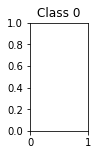

In [ ]:
#  Plot classification probability : as an example plot 2 features
plt.figure(figsize=(3 * 2, 1 * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

y_pred = m.predict(X_train)

# View probabilities:
probas = m.predict_proba(X_train)   #Xfull
n_classes = np.unique(y_pred).size
for k in range(n_classes):
    plt.subplot(1, n_classes, k + 1)
    plt.title("Class %d" % k)
    imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                extent=(3, 9, 1, 5), origin='lower')
    plt.xticks(())
    plt.yticks(())
    idx = (y_pred == k)
    if idx.any():
        plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

In [ ]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1],
                        ['Decision Tree (depth=4)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## Interpretation from previous literature
1. meta-analysis (neurosynth decoder)
2. large-scale brain networks

In [ ]:
import neurosynth as ns
ns.dataset.download(path='.', unpack=True)

from neurosynth import decode
from neurosynth.base.dataset import Dataset

dataset = Dataset('data/database.txt')
dataset.add_features('data/features.txt')

decoder = decode.Decoder(dataset)
data = decoder.decode(['svm_heat_rejection_pattern.nii'], save='decoding_ svm_heat_rejection_pattern.txt')


## Interpreting Random Forest Models

### 1) Feature Importance
* It’s basically to find out which features are important. You take each feature and shuffle the values in the feature and check how the predictions change. If it’s very different, it means that the feature was actually important; otherwise it is not that important. (permuted FI)

* the random forest feature importance is telling you in this extremely high parameter, highly flexible functional form, with few if any statistical assumptions, this is your feature importance.

* Collinearity distributes importance: random forests deal with collinearity very well, but one by-product is that collinear fields will ‘steal’ importance. The total importance will be distributed between the column.

> We might have a guess of collinearity(interactions b/t variables) but we never know the truth. Many things may interact in many subtle ways. That's why using trees work so well.


* Randomly shuffle a column(no relationships with DV) and see how accurate the pre-trained model is when you pass that in all the data as before but with one column shuffled. Then compare that accuracy with the accuracy of the original model and see how much it got worse.

* FI = amount of decrease in accuracy score for each column

* => which things do we think to care about ?

* Results : (1) top 10, (2) relative importance


In sklearn,
* The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features. 
* In scikit-learn, the fraction of samples a feature contributes to is combined with the decrease in impurity from splitting them to create a normalized estimate of the predictive power of that feature.
* By averaging the estimates of predictive ability over several randomized trees one can reduce the variance of such an estimate and use it for feature selection. This is known as the mean decrease in impurity, or MDI.
* In practice those estimates are stored as an attribute named feature_importances_ on the fitted model. This is an array with shape (n_features,) whose values are positive and sum to 1.0. The higher the value, the more important is the contribution of the matching feature to the prediction function.

In [ ]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

cols       imp
2136  2137  0.020430
6100  6101  0.015909
583    584  0.015231
5105  5106  0.014951
2927  2928  0.014229
414    415  0.013636
6101  6102  0.013428
3389  3390  0.013060
3848  3849  0.012485
1890  1891  0.012288
3210  3211  0.012221
6302  6303  0.011667
3834  3835  0.011632
4254  4255  0.011445
4692  4693  0.011138

Plot feature importance


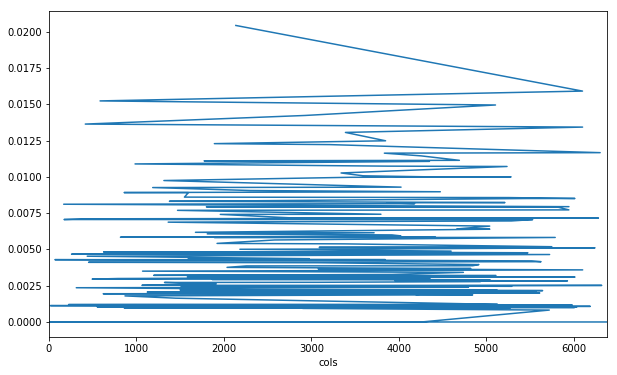

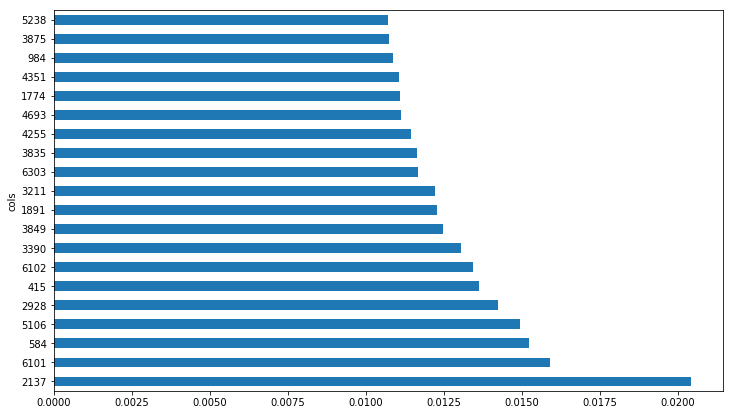

In [ ]:
# wrapper around m.feature_importances_
def rf_feat_importance(m, df):
  return pd.DataFrame({'cols':df.iloc[:,:-1].columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(m, df); 
display(fi[:15])

print("Plot feature importance")
fi.plot('cols','imp',figsize=(10,6), legend=False);
plot_fi(fi[:20]);
plt.show()

In [ ]:
# FI for cross-validated RF
def rf_feat_importance(m, df):
  fis=[]
  for idx,estimator in enumerate(m.estimators_):
    print("Features sorted by their score for estimator {}".format(idx))
    feature_importances = pd.DataFrame({'cols':df.columns, 'imp':estimator.feature_importances_}
                                      ).sort_values('imp', ascending=False)
    fis.append(pd.DataFrame(feature_importances))
  return fis
    
fi = rf_feat_importance(m, df_fmri_masked); fi[0][:10]


for i, f in enumerate(fi):
  print("Plot feature importance of {} fold".format(i))
  fi[i].plot('cols','imp',figsize=(10,6), legend=False);
  plot_fi(fi[i][:35]);

(88, 86)
rmse, accuracy, oob_score : [0.2852431179952224, 0.8669594594594594, 0.14763973024260924]


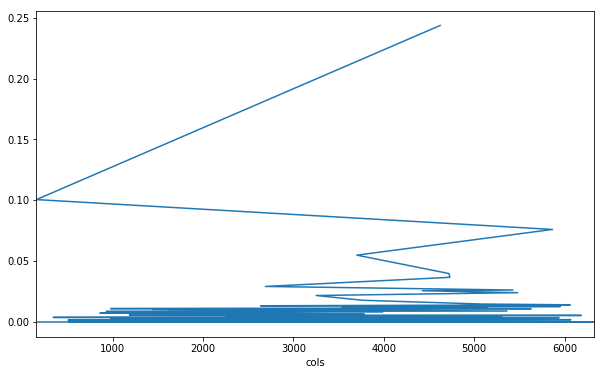

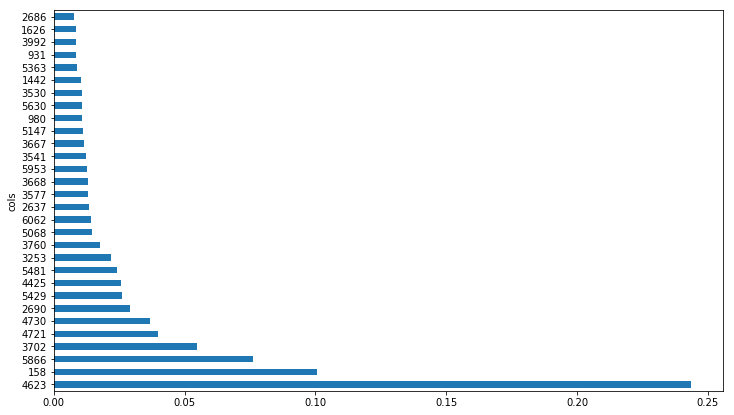

In [ ]:
# filter out cols without much importance : 
# remove redundant cols which are sources of colinearity
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

df_keep = df[to_keep].copy()
print(df_keep.shape)

X_train =df_keep.iloc[:,:-1]
# X_valid = df_keep.iloc[n:, :-1]
m = RandomForestRegressor(n_estimators=20, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

fi = rf_feat_importance(m, df_keep); fi[:10]
fi.plot('cols','imp',figsize=(10,6), legend=False);
plot_fi(fi[:30]);

In [ ]:
# Importance plot
importances = m.feature_importances_
importances = importances.reshape(data_x[0].get_data().shape)

# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()

In [ ]:
# Importance weights
feat_impt = m.feature_importances_

# reverse masking
weight_img = masker.inverse_transform(feat_impt)
# plotting.plot_stat_map(weight_img, mean_img, title='Feature Importance')
plotting.plot_glass_brain(weight_img, title='Feature Importance')
# Saving the results as a Nifti file may also be important
weight_img.to_filename('rf_featimpt_all.nii')


plotting.show()

In [ ]:
sio.savemat("featimpt_map.mat",  mdict={'fi':weight_img.get_data()})

### 2) One hot encoding
* for categorical variables (category=cardinality)
* If a variable has 6 categories, we usually map it to integers 1-6. The RF checks in each split whether a value is greater than 3? greater 4? (doing several splits), which is inefficient.
* Therefore, we create 6 columns for each category containing 1 / 0 ('is_high'). The RF now has the ability to pick one category and check whether it is true in a single split.
* This can tell you which category within the variable is more important. 

In [ ]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)    # max number of categories to one-hot-encode

### 3) Remove redundant features
* remove redundant features by clustering similar columns (dendrogram)
* hierarchical agglomerated clustering : 
> we look at every pair of objects and say which two objects are the closest. We then take the closest pair, delete them, and replace them with the midpoint of the two. Then repeat that again and again. Since we are removing points and replacing them with their averages, you are gradually reducing a number of points by pairwise combining.

* use rank correlation(not assume linearity) of features : Spearman's R
>RF cares about ordering not linearity 







In [ ]:
# dendrogram
from scipy.cluster import hierarchy as hc
import scipy.stats
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)    # distance matrix
z = hc.linkage(corr_condensed, method='average')   # tell me which things are connected to each other hierarchically
fig = plt.figure(figsize=(12,12))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, 
      orientation='left', leaf_font_size=10)
plt.show()
print(corr)

[[1.     0.387  0.5654 0.5999 0.561  0.3229 0.5502 0.615  0.4132 0.3181 0.4276 0.6736 0.4591 0.3885 0.5107]
 [0.387  1.     0.4215 0.4879 0.6259 0.5274 0.4401 0.3962 0.3643 0.5045 0.501  0.6727 0.5136 0.6153 0.571 ]
 [0.5654 0.4215 1.     0.5073 0.4693 0.4559 0.6112 0.6085 0.3838 0.3281 0.3848 0.5956 0.5169 0.5384 0.4712]
 [0.5999 0.4879 0.5073 1.     0.4983 0.3694 0.6295 0.5345 0.4048 0.379  0.3825 0.6704 0.49   0.4237 0.4279]
 [0.561  0.6259 0.4693 0.4983 1.     0.4677 0.4809 0.4378 0.3813 0.6308 0.6982 0.6446 0.5191 0.4713 0.5072]
 [0.3229 0.5274 0.4559 0.3694 0.4677 1.     0.407  0.4273 0.5611 0.3766 0.36   0.4063 0.4847 0.612  0.4487]
 [0.5502 0.4401 0.6112 0.6295 0.4809 0.407  1.     0.4714 0.4289 0.4027 0.4731 0.6627 0.5784 0.3625 0.5021]
 [0.615  0.3962 0.6085 0.5345 0.4378 0.4273 0.4714 1.     0.3223 0.3271 0.2389 0.5902 0.4782 0.5575 0.4077]
 [0.4132 0.3643 0.3838 0.4048 0.3813 0.5611 0.4289 0.3223 1.     0.3086 0.383  0.3402 0.511  0.3941 0.4734]
 [0.3181 0.5045 0.3281 0.379

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Likewise, voxels are not highly correlated (not very similar).

### 4) Partial Dependence

Partial Dependence Plot (PDP)

* the **marginal effect** one or two features have on the predicted outcome of a machine learning model (J. H. Friedman 2001)
* By marginalizing over the other features, we get a function that depends only on features in S, interactions with other features included.
* what is the relationship between two variables all things being equal 
* = if IV values were equal, what would have been the difference in DV ?
* Instead of randomly shuffling a column, we give it a constant value. This tells us the value of DV if all rows had equal values of a column. Leave the other columns as is. Pass this transformed data info RF and then average all predicted values.
* => tell us what's going on in average
* for classification, displays the probabilities for a certain class given different values for feature in S.
* for categorial features, force all data instances to have the same category.

Individual Conditional Expectation (ICE)
* ICE plot displays one line per instance that shows how the instance's prediction changes when a feature changes.
* PDP is the average lines of an ICE plot
* The values for a line (and one instance) can be computed by keeping all other features the same, creating variants of this instance by replacing the feature’s value with values from a grid and making predictions with the black box model for these newly created instances.
* The result is a set of points for an instance with the feature value from the grid and the respective predictions.
* Centered ICE : Usually, the curves are centered at a certain point in the feature(lower end) and only the difference in the prediction to this point is displayed. This makes it easier to compare the curves of individual instances

Disadvantages
* If the feature of interest is correlated with other features, then some points in the lines might be invalid data points according to the joint feature distribution.

In [ ]:
!pip install pdpbox
!pip install plotnine
!pip install scikit-misc

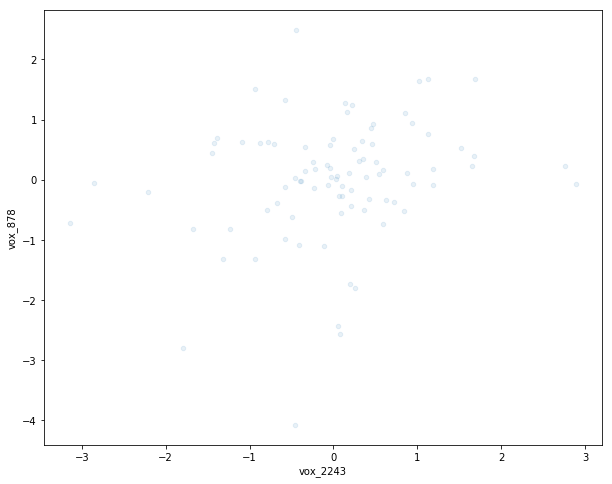

In [ ]:
# check dependency between IVs
from plotnine import *
from pdpbox import pdp
df_keep.plot('vox_2243', 'vox_878', 'scatter', alpha=0.1, figsize=(10,8));

In [ ]:
# check dependencies between IV and DV :  plot locally weighted regression with smoother
# good for looking at univariate relationships BUT interactions may be lost
from plotnine import *
ggplot(df, aes(7, 'bfne'))+stat_smooth(se=True, method='loess')

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


<ggplot: (-9223363262231573209)>

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc950b52110>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc95bf26990>})

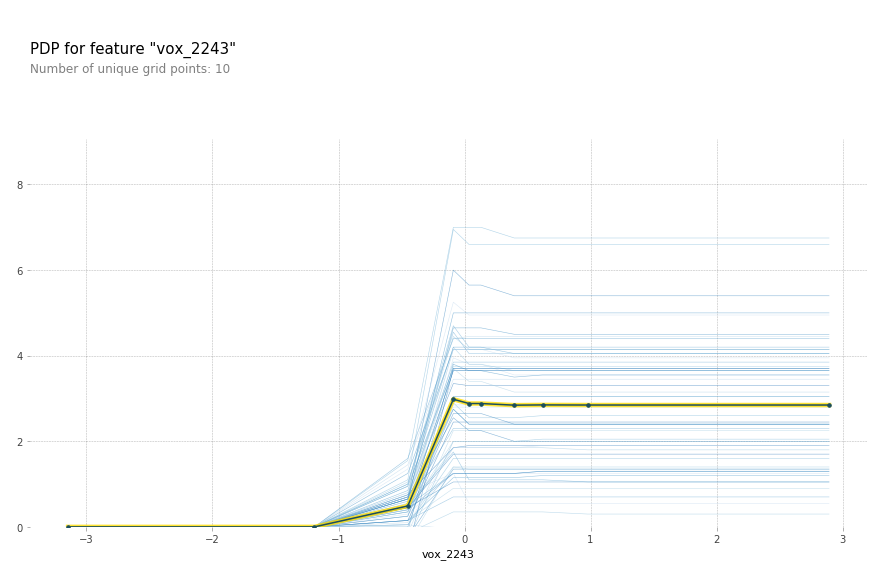

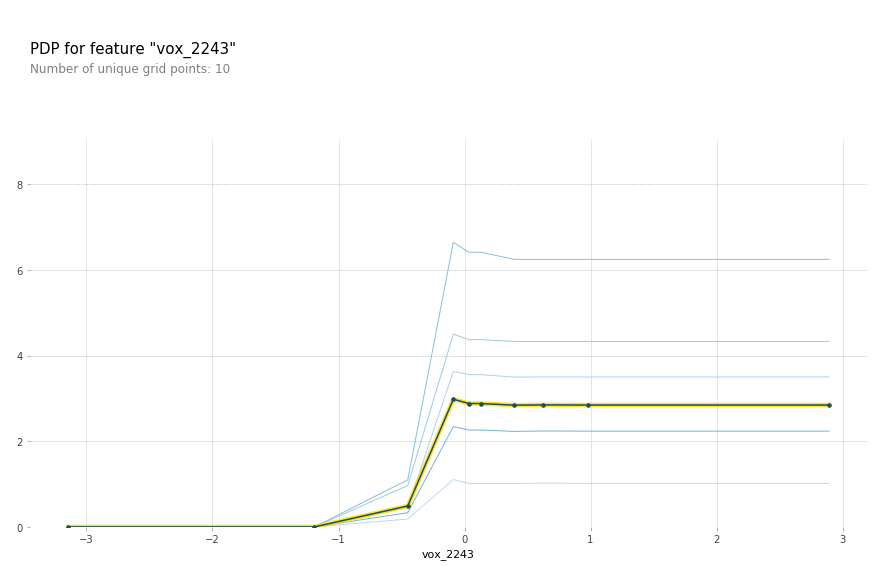

In [ ]:
# partial dependence plot
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, X_train, X_train.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, 
                        n_cluster_centers=clusters)
plot_pdp('vox_2243')
plot_pdp('vox_2243', clusters=5)

(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc95bf998d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc9505297d0>})

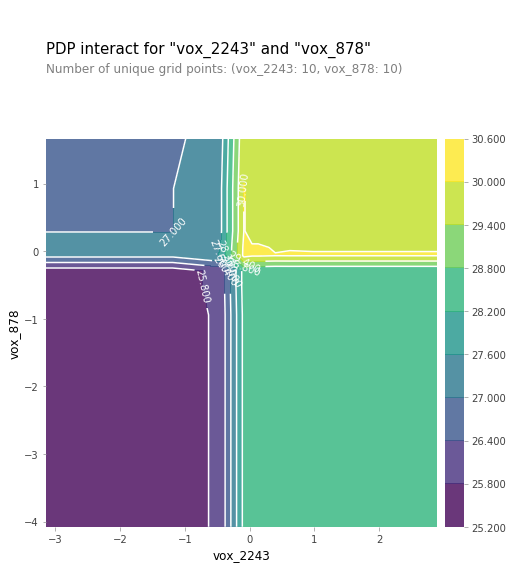

In [ ]:
# interaction plot : visually see if there are interactions between IVs
feats=['vox_2243','vox_878']
p = pdp.pdp_interact(m, X_train, X_train.columns, feats)
pdp.pdp_interact_plot(p, feats)

In [ ]:
# for one-hot encoded variables, you can plot PDP based on categories
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 
         'Enclosure_OROPS'], 5, 'Enclosure')

### 5) Tree Interpreter
* what is the prediction path? tells us how the model makes prediction for an individual row

Returns :
* prediction : The prediction from the random forest
* bias : The average DV value across the whole original dataset
* contributions: A column and the value to split by (i.e. the predictor), and how much it changed the predicted value. 
> e.g. the value of a column pos/neg impacted the predicted value

* draw a waterfall chart : changes of predicted value after a decision -> when combined, it is the final prediction

* If you add up all the contributions of each row, it is feature importance

In [ ]:
!pip install treeinterpreter
!pip install waterfallcharts

In [ ]:
from treeinterpreter import treeinterpreter as ti

# for subject 1
row=X_train.values[None,0]; row

prediction, bias, contributions = ti.predict(m, row)
y_train.values[None,0], prediction[0], bias[0]

# add all the tree influences
idxs = np.argsort(contributions[0])
display([o for o in zip(df_keep.columns[idxs], X_train.iloc[0][idxs], contributions[0][idxs])])

# add all the contributions
contributions[0].sum()

In [ ]:
import waterfall_chart


### 6) Confidence based on tree variance
* usually the predicted value is the average of all tree predictions
* But this tells us the variance of the trees
1) how confident we are for a single row
2) how confident we are for certain groups

### 7) Extrapolation
* If your predictors are not time-dependent and can extrapolate, they would NOT be able to predict whether the target is in the validation set(seen before) or test set(not seen before).
* If removing time-dependent predictors improves your model, remove it!

### 8) Interaction Importance
* 